In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind
from google.colab import files

In [3]:
uploaded = files.upload()

Saving TikTok Category.xlsx to TikTok Category.xlsx
Saving Top-1000-Celebrity-Twitter-Accounts.csv to Top-1000-Celebrity-Twitter-Accounts.csv
Saving instagram_global_top_1000.csv to instagram_global_top_1000.csv
Saving Instagram User.csv to Instagram User.csv
Saving social_media_demo.xlsx to social_media_demo.xlsx
Saving Top 15 Social Media Active Users January 2023.csv to Top 15 Social Media Active Users January 2023.csv
Saving Clean_Top_1000_Youtube_df - youtubers_df.csv to Clean_Top_1000_Youtube_df - youtubers_df.csv
Saving YouTubeDataset_withChannelElapsed.csv to YouTubeDataset_withChannelElapsed.csv
Saving instagram_top_50_2023-07-03.csv to instagram_top_50_2023-07-03.csv
Saving tiktok_top_50_2023-07-03.csv to tiktok_top_50_2023-07-03.csv
Saving twitter_top_50_2023-07-03.csv to twitter_top_50_2023-07-03.csv
Saving youtube_top_50_2023-07-03.csv to youtube_top_50_2023-07-03.csv
Saving tiktok_top_1000.csv to tiktok_top_1000.csv


In [4]:
tt_top_1000 = pd.read_csv('tiktok_top_1000.csv')
tt_top_1000

,Country,Rank,Account,Title,Link,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.,Scraped
0,All,1,billieeilish,BILLIE EILISH,https://www.tiktok.com/@billieeilish,41600000.0,95000000.0,18100000.0,151000.0,54800.0,2022-02-07 16:54:35.641971
1,All,2,badbunny,Bad Bunny,https://www.tiktok.com/@badbunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0,2022-02-07 16:54:35.641971
2,All,3,chipmunksoftiktok,Chipmunks of TikTok,https://www.tiktok.com/@chipmunksoftiktok,11400000.0,25000000.0,3000000.0,21800.0,64200.0,2022-02-07 16:54:35.641971
3,All,4,charlidamelio,charli d’amelio,https://www.tiktok.com/@charlidamelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0,2022-02-07 16:54:35.641971
4,All,5,yessicadcs,Yessica y Moises 🦜,https://www.tiktok.com/@yessicadcs,263700.0,16700000.0,1400000.0,16200.0,138400.0,2022-02-07 16:54:35.641971
...,...,...,...,...,...,...,...,...,...,...,...
995,All,996,leleburnier,LELÊ BURNIER,https://www.tiktok.com/@leleburnier,1100000.0,1200000.0,284300.0,2800.0,968.0,2022-02-07 16:54:35.641971
996,All,997,sofiadelmonstro,Cat Sofia,https://www.tiktok.com/@sofiadelmonstro,5200000.0,2600000.0,161200.0,1300.0,1600.0,2022-02-07 16:54:35.641971
997,All,998,jena,Jena,https://www.tiktok.com/@jena,10500000.0,2800000.0,320300.0,856.0,512.0,2022-02-07 16:54:35.641971
998,All,999,christiandaloii_,Christiandaloii_,https://www.tiktok.com/@christiandaloii_,2700000.0,1100000.0,188600.0,3000.0,2900.0,2022-02-07 16:54:35.641971


In [5]:
tt_top_1000 = tt_top_1000.drop(columns=['Country','Link','Scraped'])

In [6]:
tt_top_1000 = tt_top_1000.set_index('Rank')

In [7]:
tt_top_1000.dtypes

Account               object
Title                 object
Subscribers count    float64
Views avg.           float64
Likes avg.           float64
Comments avg.        float64
Shares avg.          float64
dtype: object

In [8]:
tt_top_1000

,Account,Title,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.
Rank,,,,,,,
1,billieeilish,BILLIE EILISH,41600000.0,95000000.0,18100000.0,151000.0,54800.0
2,badbunny,Bad Bunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0
3,chipmunksoftiktok,Chipmunks of TikTok,11400000.0,25000000.0,3000000.0,21800.0,64200.0
4,charlidamelio,charli d’amelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0
5,yessicadcs,Yessica y Moises 🦜,263700.0,16700000.0,1400000.0,16200.0,138400.0
...,...,...,...,...,...,...,...
996,leleburnier,LELÊ BURNIER,1100000.0,1200000.0,284300.0,2800.0,968.0
997,sofiadelmonstro,Cat Sofia,5200000.0,2600000.0,161200.0,1300.0,1600.0
998,jena,Jena,10500000.0,2800000.0,320300.0,856.0,512.0


In [9]:
tt_top_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Account            1000 non-null   object 
 1   Title              998 non-null    object 
 2   Subscribers count  1000 non-null   float64
 3   Views avg.         1000 non-null   float64
 4   Likes avg.         1000 non-null   float64
 5   Comments avg.      1000 non-null   float64
 6   Shares avg.        1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 62.5+ KB


In [10]:
tt_top_1000.isna().sum()

Account              0
Title                2
Subscribers count    0
Views avg.           0
Likes avg.           0
Comments avg.        0
Shares avg.          0
dtype: int64

In [11]:
tt_top_1000.describe()

,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,7.049170e+06,3.700866e+06,4.537407e+05,4559.051000,1.068108e+04
std,1.087267e+07,4.697164e+06,6.964760e+05,7766.145534,1.677724e+05
min,4.300000e+03,5.853000e+05,3.100000e+04,0.000000,2.120000e+02
25%,1.400000e+06,1.800000e+06,2.304500e+05,1600.000000,1.200000e+03
50%,3.700000e+06,2.600000e+06,3.202000e+05,2800.000000,2.400000e+03
75%,8.625000e+06,4.000000e+06,4.783750e+05,4900.000000,5.400000e+03
max,1.354000e+08,9.500000e+07,1.810000e+07,151000.000000,5.300000e+06


In [12]:
subscribers_lower = tt_top_1000['Subscribers count'].quantile(0.25)

subscribers_upper = tt_top_1000['Subscribers count'].quantile(0.75)

subscribers_iqr = subscribers_upper - subscribers_lower

threshold_lower = subscribers_lower - 1.5*subscribers_iqr

threshold_upper = subscribers_upper + 1.5*subscribers_iqr

outlier = (tt_top_1000['Subscribers count'] < threshold_lower) | (tt_top_1000['Subscribers count'] > threshold_upper)

tt_top_1000[outlier]

,Account,Title,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.
Rank,,,,,,,
1,billieeilish,BILLIE EILISH,41600000.0,95000000.0,18100000.0,151000.0,54800.0
4,charlidamelio,charli d’amelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0
6,therock,The Rock,49700000.0,24700000.0,3000000.0,30900.0,16400.0
14,noahschnapp,Noah Schnapp,20100000.0,8600000.0,1800000.0,42000.0,11300.0
18,iamferv,Fernanda,24600000.0,12900000.0,1900000.0,15800.0,8300.0
...,...,...,...,...,...,...,...
824,devonrodriguezart,Devon Rodriguez,23300000.0,3700000.0,224900.0,1200.0,802.0
856,cznburak,cznburak,56000000.0,2900000.0,170600.0,2000.0,1200.0
925,ignaciaa_antonia,Ignacia Antonia👑,26800000.0,2300000.0,347400.0,1200.0,556.0


<ipython-input-13-be5b44133832>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = tt_top_1000.corr()


<Axes: >

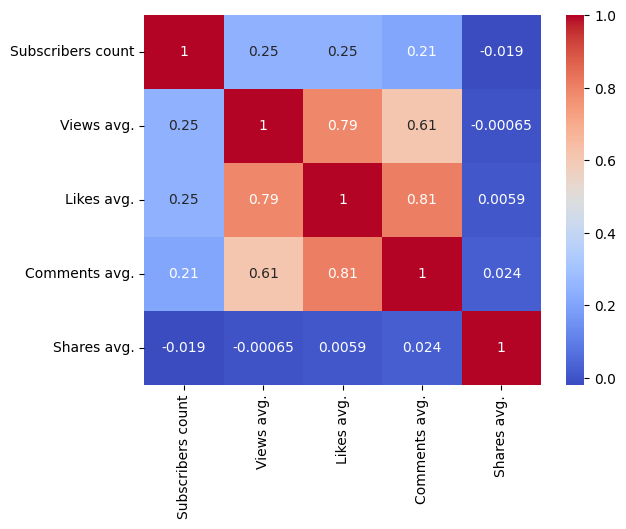

In [13]:
correlation = tt_top_1000.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [14]:
tt_top_1000.describe()

,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.
count,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03
mean,7.049170e+06,3.700866e+06,4.537407e+05,4559.051000,1.068108e+04
std,1.087267e+07,4.697164e+06,6.964760e+05,7766.145534,1.677724e+05
min,4.300000e+03,5.853000e+05,3.100000e+04,0.000000,2.120000e+02
25%,1.400000e+06,1.800000e+06,2.304500e+05,1600.000000,1.200000e+03
50%,3.700000e+06,2.600000e+06,3.202000e+05,2800.000000,2.400000e+03
75%,8.625000e+06,4.000000e+06,4.783750e+05,4900.000000,5.400000e+03
max,1.354000e+08,9.500000e+07,1.810000e+07,151000.000000,5.300000e+06


In [15]:
small = (tt_top_1000['Subscribers count'] >= tt_top_1000['Subscribers count'].quantile(0.25)) & (tt_top_1000['Subscribers count'] <= tt_top_1000['Subscribers count'].median())

medium = (tt_top_1000['Subscribers count'] >= tt_top_1000['Subscribers count'].median()) & (tt_top_1000['Subscribers count'] <= tt_top_1000['Subscribers count'].quantile(0.75))

large = tt_top_1000['Subscribers count'] >= tt_top_1000['Subscribers count'].quantile(0.75)

In [16]:
conditions = [small, medium, large]

subscriber_category = ['Small', 'Medium', 'Large']

tt_top_1000['Subscribers Category'] = np.select(conditions, subscriber_category, default='Less Subscribers')

In [17]:
tt_top_1000

,Account,Title,Subscribers count,Views avg.,Likes avg.,Comments avg.,Shares avg.,Subscribers Category
Rank,,,,,,,,
1,billieeilish,BILLIE EILISH,41600000.0,95000000.0,18100000.0,151000.0,54800.0,Large
2,badbunny,Bad Bunny,13400000.0,33300000.0,7300000.0,101900.0,106800.0,Large
3,chipmunksoftiktok,Chipmunks of TikTok,11400000.0,25000000.0,3000000.0,21800.0,64200.0,Large
4,charlidamelio,charli d’amelio,135400000.0,18700000.0,2600000.0,54700.0,35200.0,Large
5,yessicadcs,Yessica y Moises 🦜,263700.0,16700000.0,1400000.0,16200.0,138400.0,Less Subscribers
...,...,...,...,...,...,...,...,...
996,leleburnier,LELÊ BURNIER,1100000.0,1200000.0,284300.0,2800.0,968.0,Less Subscribers
997,sofiadelmonstro,Cat Sofia,5200000.0,2600000.0,161200.0,1300.0,1600.0,Medium
998,jena,Jena,10500000.0,2800000.0,320300.0,856.0,512.0,Large


In [18]:
tt_top_1000['Subscribers count(million)'] = tt_top_1000['Subscribers count']/1000000

tt_top_1000['Views avg(million)'] = tt_top_1000['Views avg.']/1000000

tt_top_1000['Likes avg(million)'] = tt_top_1000['Likes avg.']/1000000

tt_top_1000['Comments avg(thousand)'] = tt_top_1000['Comments avg.']/1000

tt_top_1000['Shares avg(thousand)'] = tt_top_1000['Shares avg.']/1000

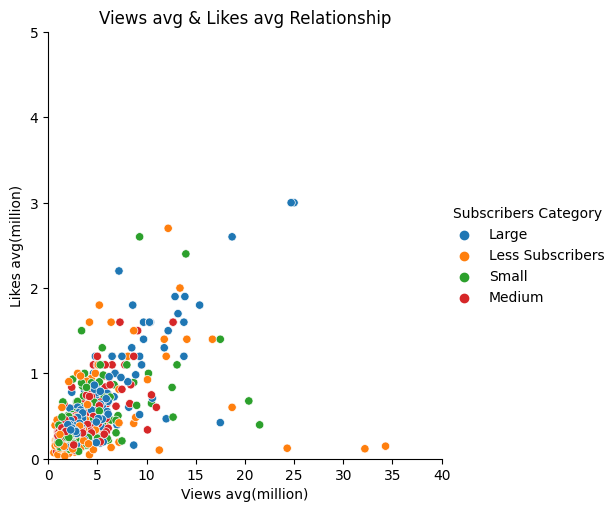

In [19]:
sns.relplot(data=tt_top_1000, x='Views avg(million)', y='Likes avg(million)', hue='Subscribers Category',kind='scatter')
plt.title('Views avg & Likes avg Relationship')
plt.xlim(0,40)
plt.ylim(0,5)
plt.show()

In [20]:
subscribers_order = ['Large','Medium','Small','Less Subscribers']

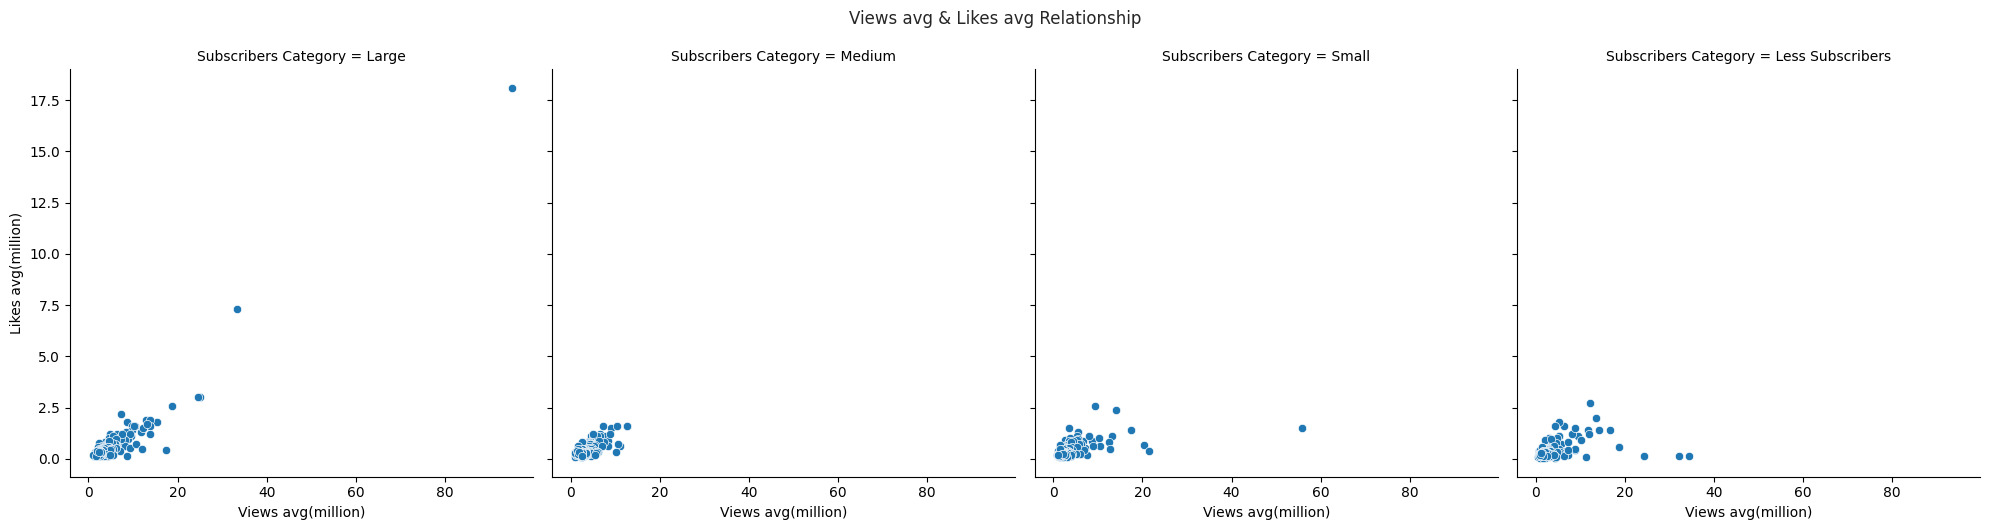

In [21]:
g = sns.relplot(data=tt_top_1000, x='Views avg(million)', y='Likes avg(million)', col='Subscribers Category',col_order = subscribers_order, kind='scatter')
sns.set_style('whitegrid')
g.fig.suptitle('Views avg & Likes avg Relationship',y=1.05)
plt.show()

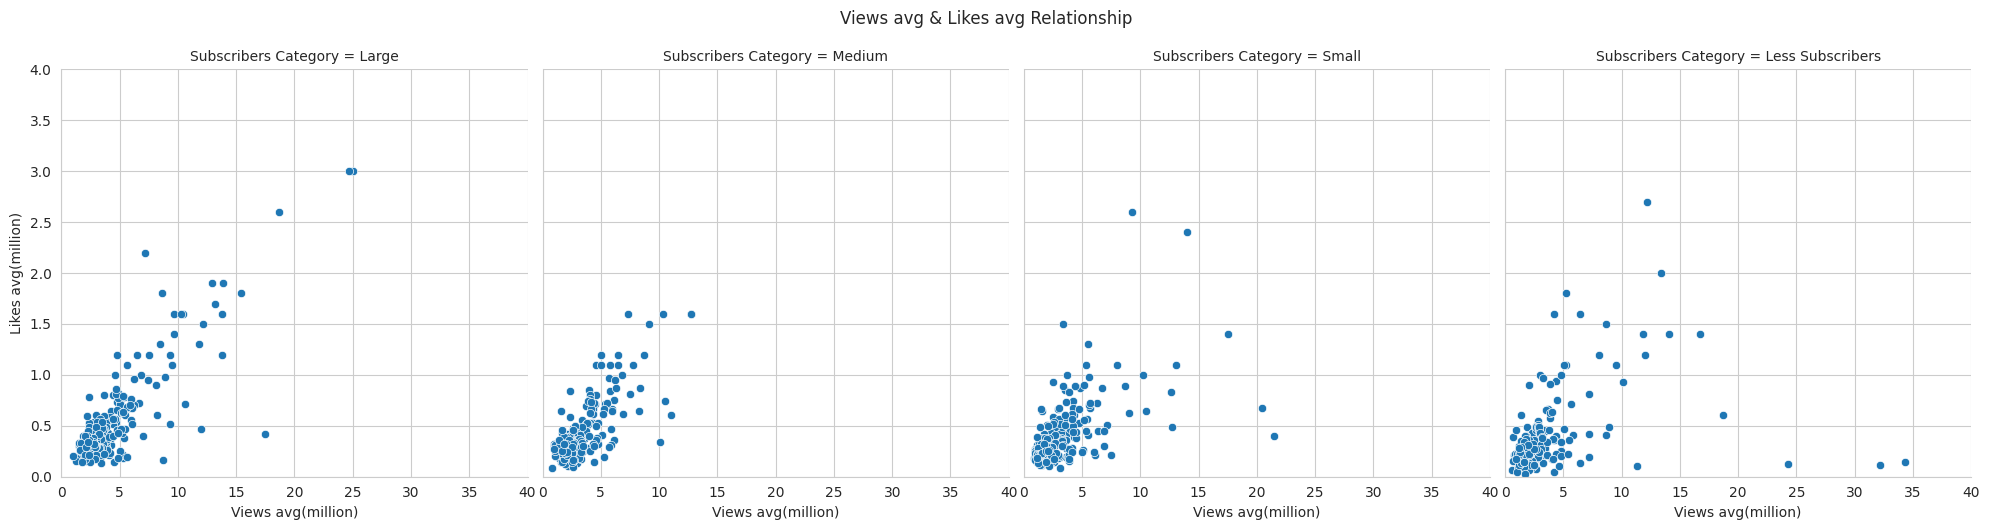

In [22]:
g = sns.relplot(data=tt_top_1000, x='Views avg(million)', y='Likes avg(million)', col='Subscribers Category',col_order = subscribers_order, kind='scatter')
sns.set_style('whitegrid')
g.fig.suptitle('Views avg & Likes avg Relationship',y=1.05)
plt.xlim(0,40)
plt.ylim(0,4)
plt.show()

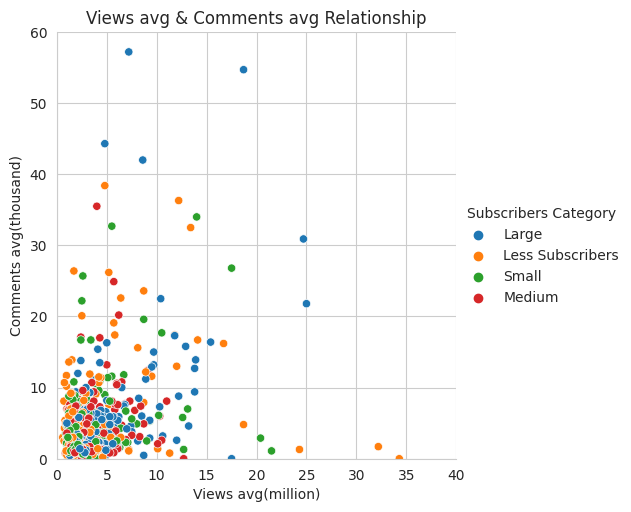

In [23]:
sns.relplot(data=tt_top_1000, x='Views avg(million)', y='Comments avg(thousand)', hue='Subscribers Category',kind='scatter')
plt.title('Views avg & Comments avg Relationship')
plt.xlim(0,40)
plt.ylim(0,60)
plt.show()

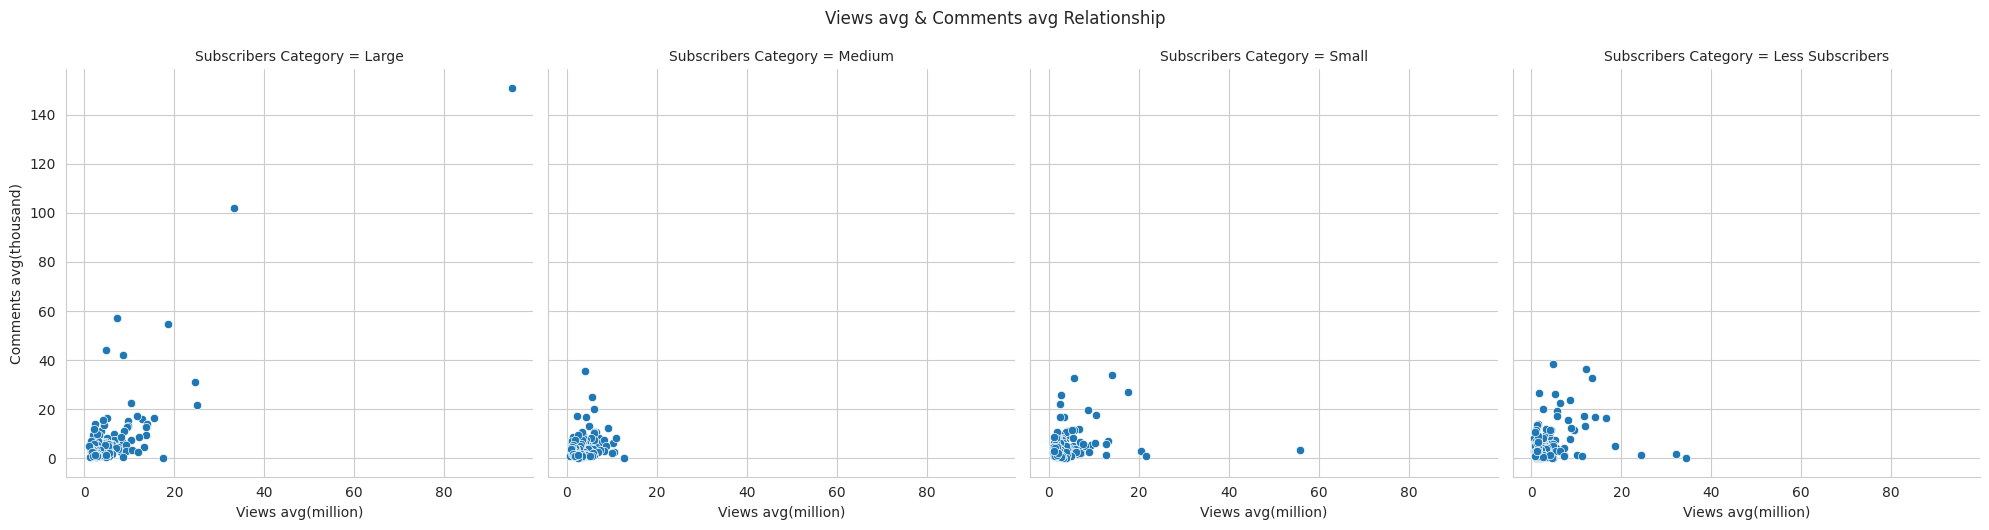

In [24]:
g = sns.relplot(data=tt_top_1000, x='Views avg(million)', y='Comments avg(thousand)', col='Subscribers Category',col_order = subscribers_order, kind='scatter')
g.fig.suptitle('Views avg & Comments avg Relationship',y=1.05)
sns.set_style('whitegrid')
plt.show()

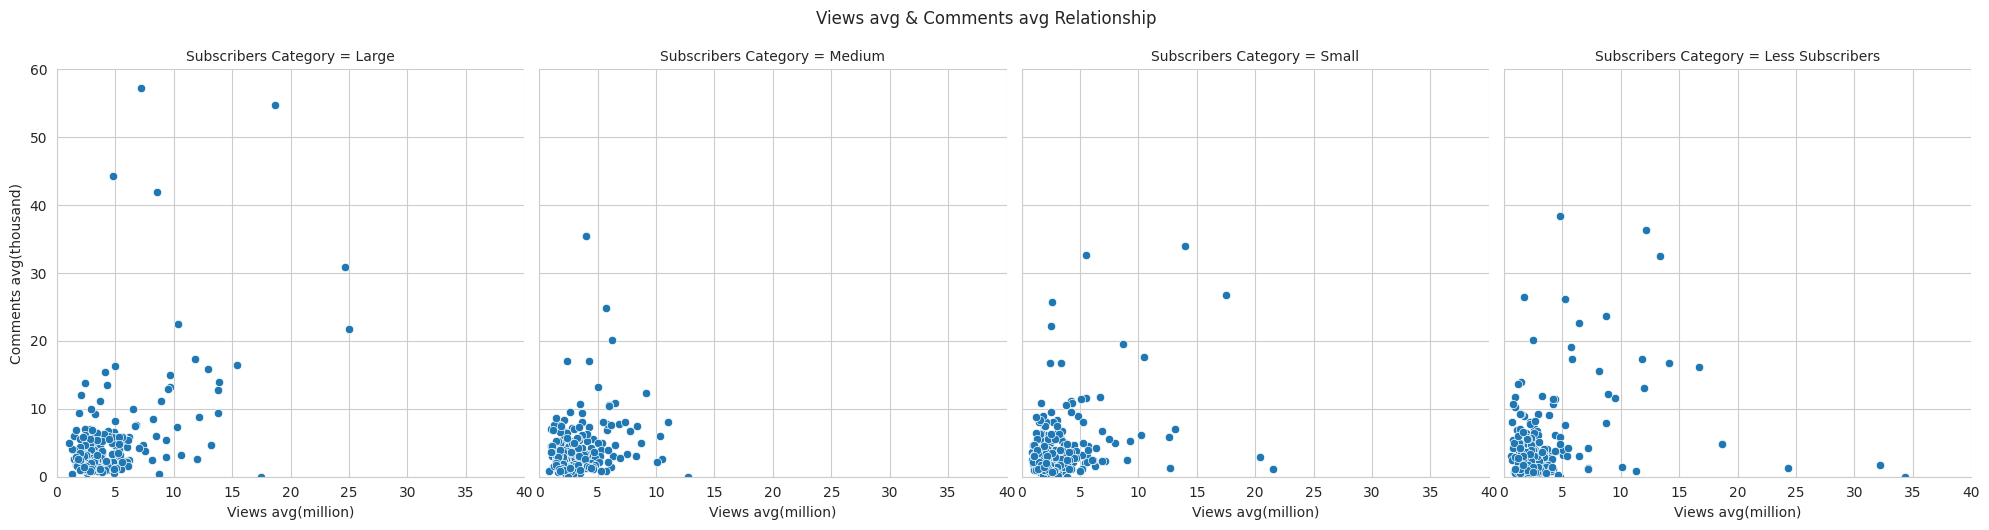

In [25]:
g = sns.relplot(data=tt_top_1000, x='Views avg(million)', y='Comments avg(thousand)', col='Subscribers Category',col_order = subscribers_order, kind='scatter')
g.fig.suptitle('Views avg & Comments avg Relationship',y=1.05)
plt.xlim(0,40)
plt.ylim(0,60)
sns.set_style('whitegrid')
plt.show()

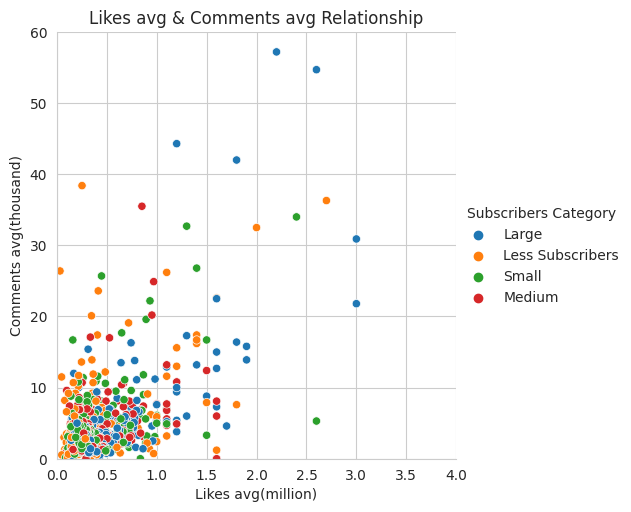

In [26]:
sns.relplot(data=tt_top_1000, x='Likes avg(million)', y='Comments avg(thousand)', hue='Subscribers Category',kind='scatter')
plt.title('Likes avg & Comments avg Relationship')
plt.xlim(0,4)
plt.ylim(0,60)
plt.show()

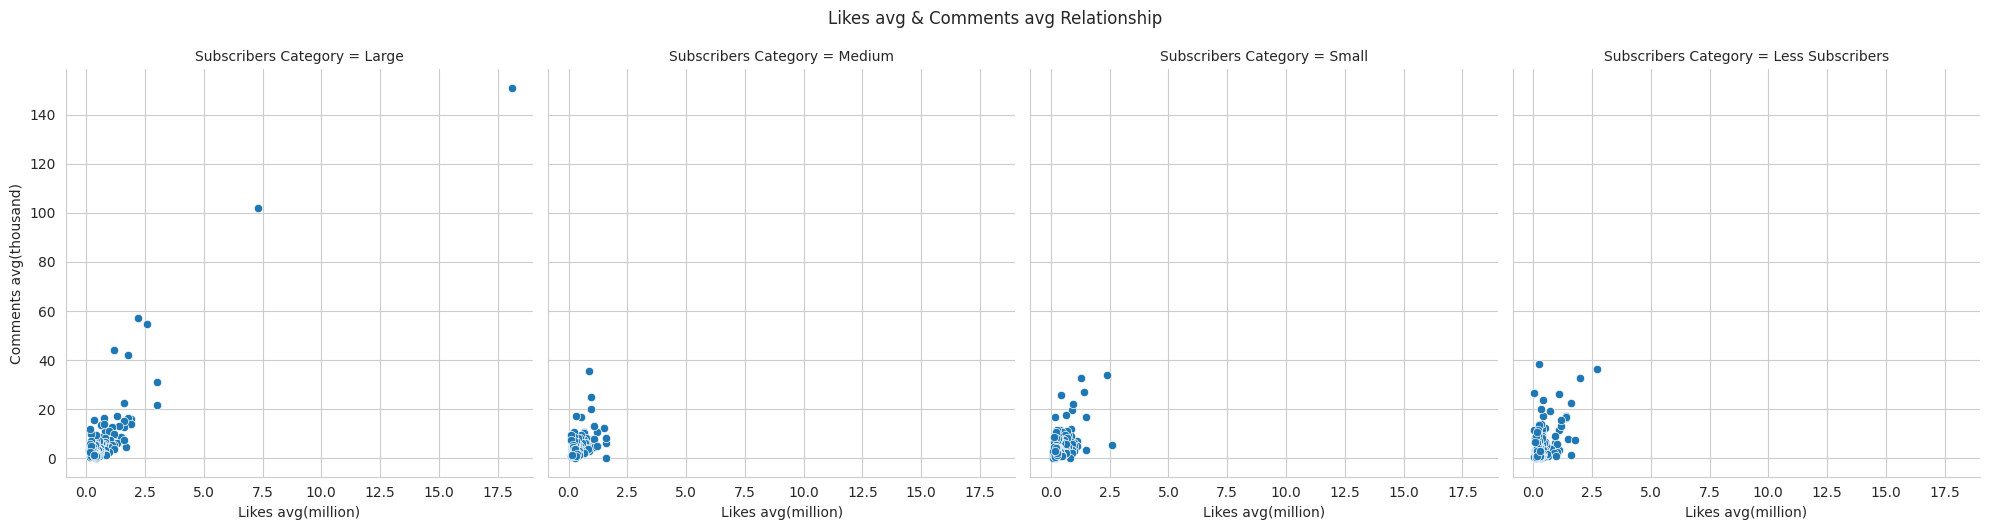

In [27]:
g = sns.relplot(data=tt_top_1000, x='Likes avg(million)', y='Comments avg(thousand)', col='Subscribers Category',col_order = subscribers_order, kind='scatter')
sns.set_style('whitegrid')
g.fig.suptitle('Likes avg & Comments avg Relationship',y=1.05)
plt.show()

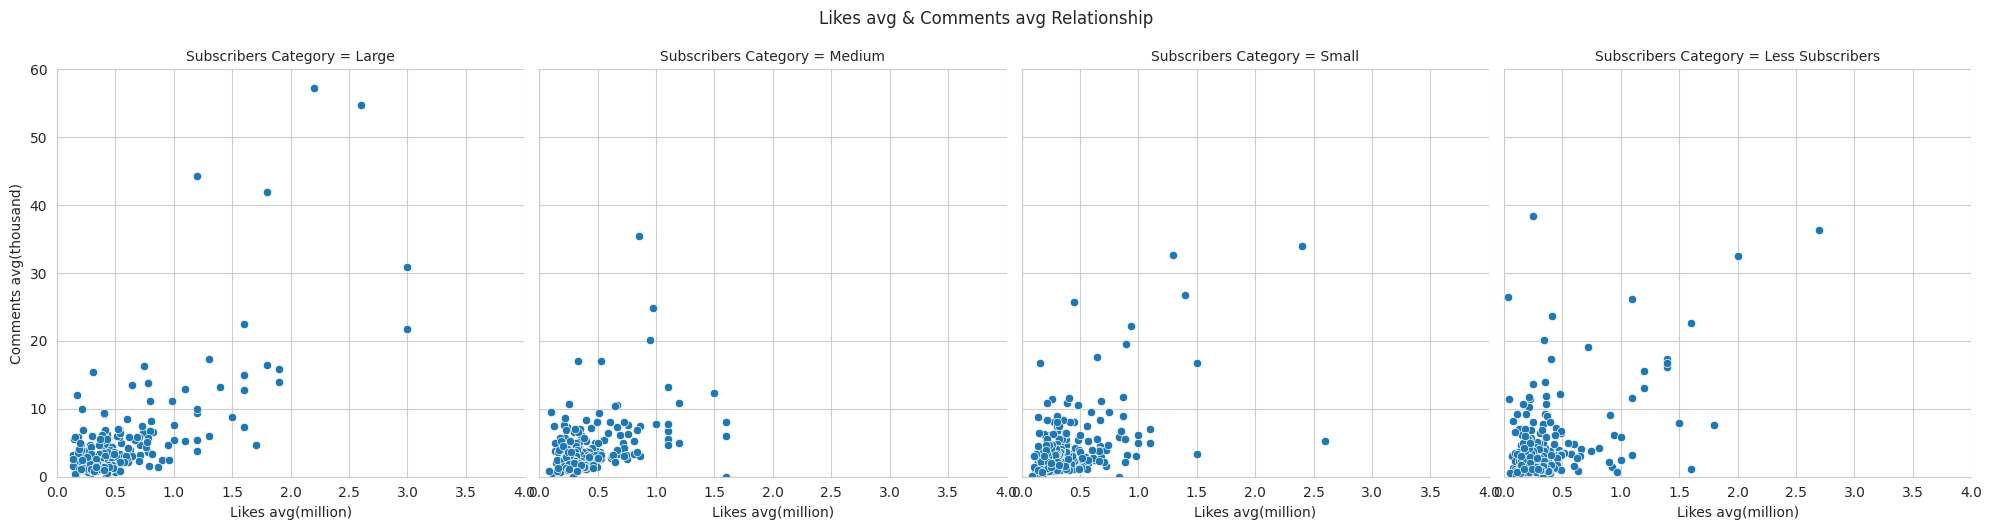

In [28]:
g = sns.relplot(data=tt_top_1000, x='Likes avg(million)', y='Comments avg(thousand)', col='Subscribers Category',col_order = subscribers_order, kind='scatter')
sns.set_style('whitegrid')
g.fig.suptitle('Likes avg & Comments avg Relationship',y=1.05)
plt.xlim(0,4)
plt.ylim(0,60)
plt.show()

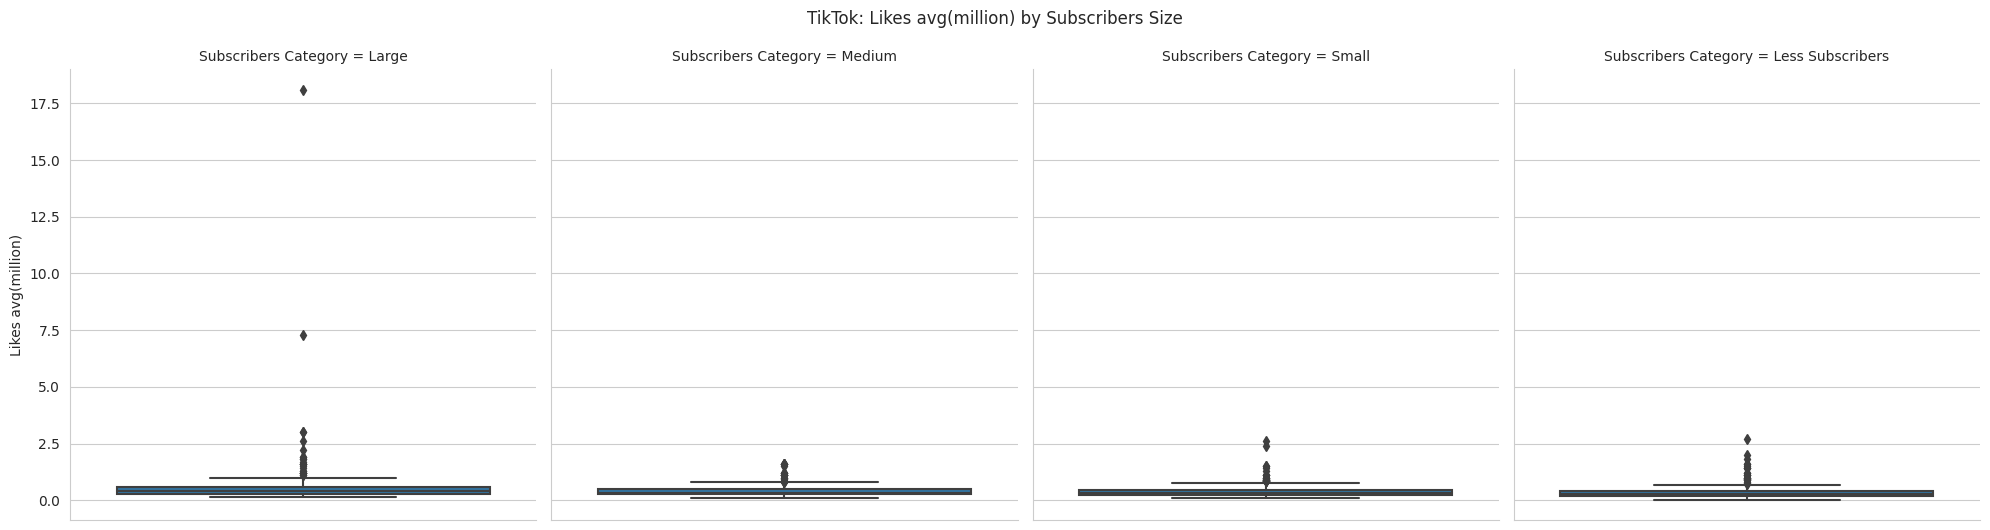

In [213]:
sns.catplot(data=tt_top_1000, y='Likes avg(million)',col='Subscribers Category',col_order= subscribers_order, kind='box').fig.suptitle('TikTok: Likes avg(million) by Subscribers Size',y=1.05)
plt.show()

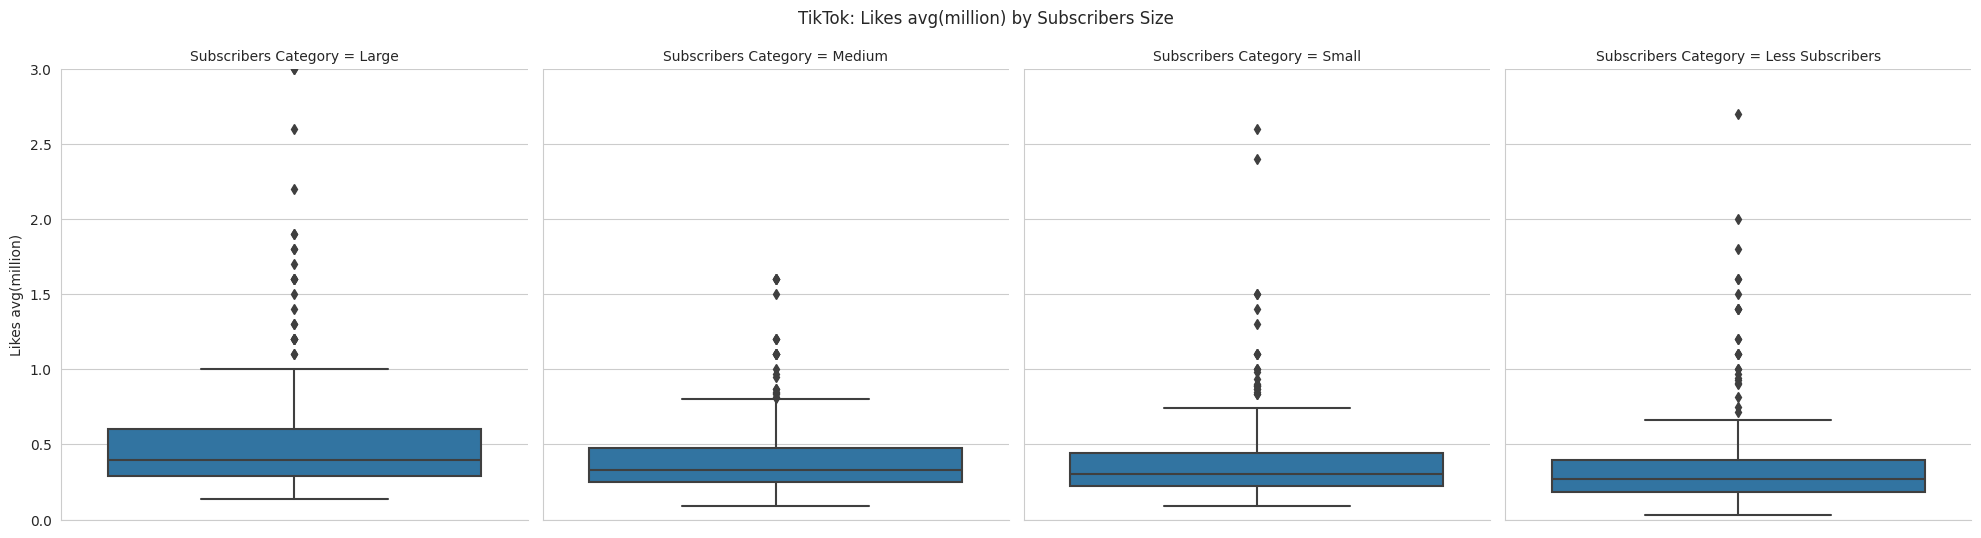

In [214]:
sns.catplot(data=tt_top_1000, y='Likes avg(million)',col='Subscribers Category',col_order= subscribers_order, kind='box').fig.suptitle('TikTok: Likes avg(million) by Subscribers Size',y=1.05)
plt.ylim(0,3)
plt.show()

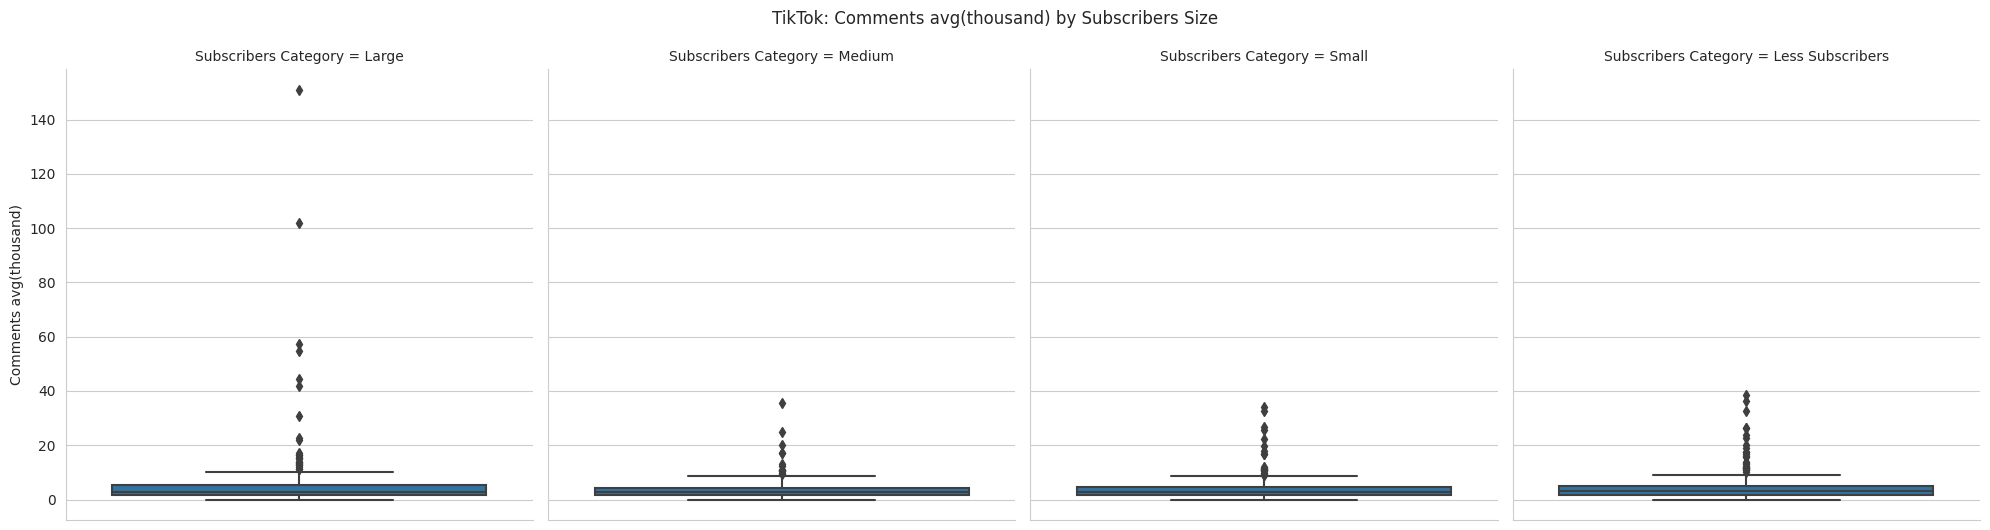

In [215]:
sns.catplot(data=tt_top_1000, y='Comments avg(thousand)',col='Subscribers Category',col_order= subscribers_order, kind='box').fig.suptitle('TikTok: Comments avg(thousand) by Subscribers Size',y=1.05)

plt.show()

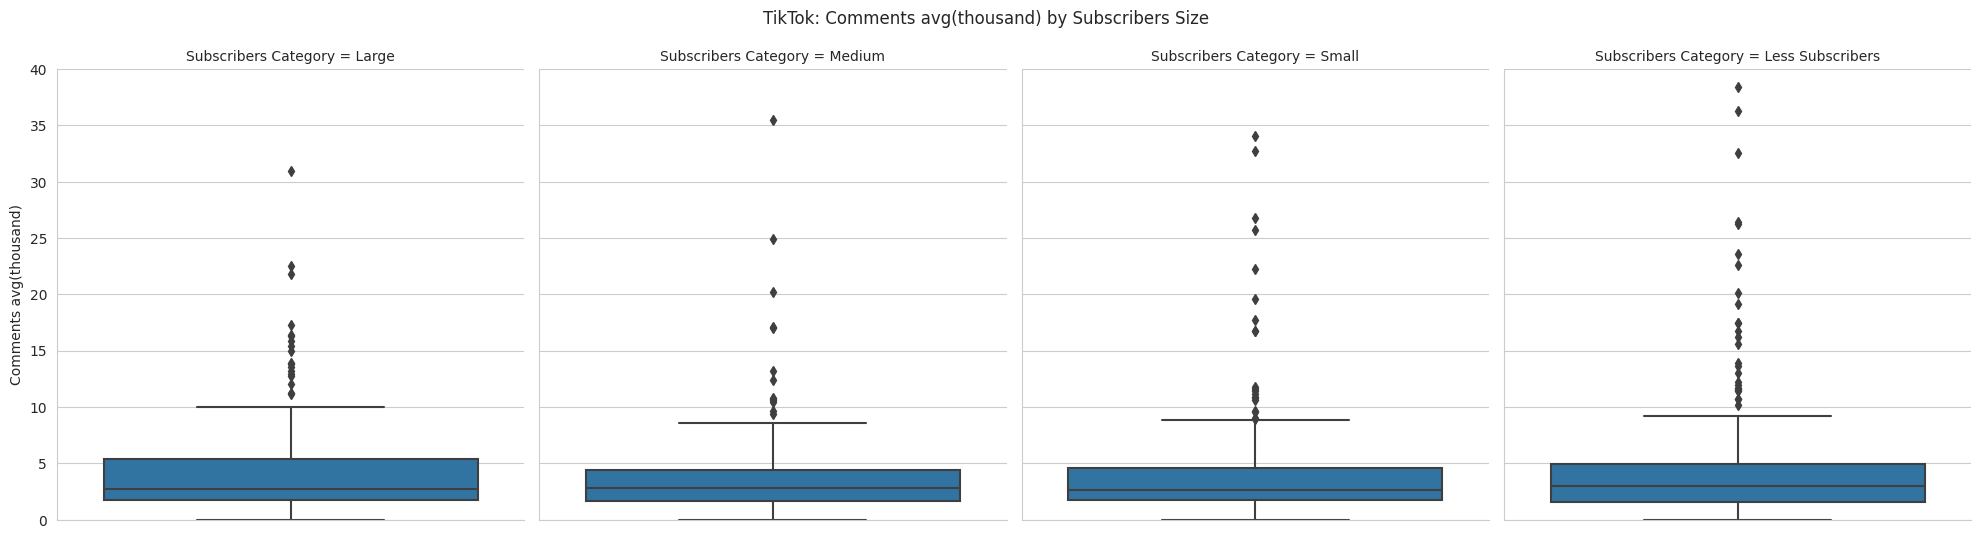

In [216]:
sns.catplot(data=tt_top_1000, y='Comments avg(thousand)',col='Subscribers Category',col_order= subscribers_order, kind='box').fig.suptitle('TikTok: Comments avg(thousand) by Subscribers Size',y=1.05)
plt.ylim(0,40)
plt.show()

In [29]:
views = tt_top_1000['Views avg(million)']
likes = tt_top_1000['Likes avg(million)']
comments = tt_top_1000['Comments avg(thousand)']
shares = tt_top_1000['Shares avg(thousand)']

views = sm.add_constant(views)

model_likes = sm.OLS(likes, views).fit()

result_likes = model_likes.summary()

print(result_likes)

                            OLS Regression Results                            
Dep. Variable:     Likes avg(million)   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     1641.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          5.40e-213
Time:                        19:55:34   Log-Likelihood:                -570.42
No. Observations:                1000   AIC:                             1145.
Df Residuals:                     998   BIC:                             1155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0210      0

In [30]:
model_comments = sm.OLS(comments, views).fit()

result_comments = model_comments.summary()

print(result_comments)

                              OLS Regression Results                              
Dep. Variable:     Comments avg(thousand)   R-squared:                       0.377
Model:                                OLS   Adj. R-squared:                  0.376
Method:                     Least Squares   F-statistic:                     603.7
Date:                    Tue, 28 Nov 2023   Prob (F-statistic):          1.25e-104
Time:                            19:55:39   Log-Likelihood:                -3231.7
No. Observations:                    1000   AIC:                             6467.
Df Residuals:                         998   BIC:                             6477.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [31]:
model_shares = sm.OLS(shares, views).fit()

result_shares = model_shares.summary()

print(result_shares)

                             OLS Regression Results                             
Dep. Variable:     Shares avg(thousand)   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                 0.0004178
Date:                  Tue, 28 Nov 2023   Prob (F-statistic):              0.984
Time:                          19:55:43   Log-Likelihood:                -6541.0
No. Observations:                  1000   AIC:                         1.309e+04
Df Residuals:                       998   BIC:                         1.310e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const           

In [32]:
x = tt_top_1000[['Views avg(million)','Likes avg(million)','Comments avg(thousand)','Shares avg(thousand)']]
y = tt_top_1000['Subscribers count(million)']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

results = model.summary()

print(results)

                                OLS Regression Results                                
Dep. Variable:     Subscribers count(million)   R-squared:                       0.068
Model:                                    OLS   Adj. R-squared:                  0.064
Method:                         Least Squares   F-statistic:                     18.21
Date:                        Tue, 28 Nov 2023   Prob (F-statistic):           1.91e-14
Time:                                19:55:45   Log-Likelihood:                -3769.4
No. Observations:                        1000   AIC:                             7549.
Df Residuals:                             995   BIC:                             7573.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [33]:
tt_top_50 = pd.read_csv('tiktok_top_50_2023-07-03.csv')
tt_top_50

,Rank,Username,Owner,Followers(millions),Likes(billions),Description,Country
0,1,@khaby.lame,Khabane Lame,161.1,2.30,Social media personality,Italy Senegal
1,2,@charlidamelio,Charli D'Amelio,150.9,11.40,Dancer and social media personality,United States
2,3,@bellapoarch,Bella Poarch,92.7,2.30,Singer and social media personality,Philippines United States
3,4,@addisonre,Addison Rae,88.6,5.80,Social media personality and dancer,United States
4,5,@mrbeast,MrBeast,84.0,0.85,Social media personality,United States
5,6,@zachking,Zach King,77.7,1.00,Social media personality,United States
6,7,@kimberly.loaiza,Kimberly Loaiza,75.6,4.70,Singer and social media personality,Mexico
7,8,@willsmith,Will Smith,73.3,0.51,Actor and film producer,United States
8,9,@tiktok,TikTok,73.3,0.30,Social media platform,China
9,10,@cznburak,Burak Özdemir,71.7,1.40,Social media personality,Turkey


In [34]:
tt_top_50['Description'].value_counts()

Social media personality                                 26
Singer and social media personality                       3
Band                                                      2
Dancer and social media personality                       2
Model and socialite                                       1
Media personality, former pornographic actress            1
Social media personalities                                1
Chef, television personality                              1
Football club                                             1
Singer, dancer, and social media personality              1
Singer                                                    1
Singer and songwriter                                     1
Beatboxer and social media personality                    1
Singer, dancer, actress, and social media personality     1
Singer, songwriter, and dancer                            1
Singer, songwriter, and actress                           1
Actor and former wrestler               

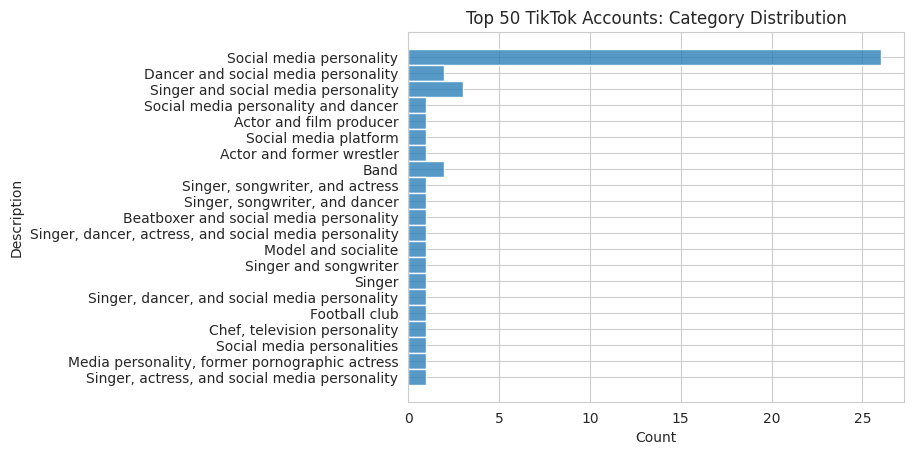

In [35]:
g = sns.histplot(data=tt_top_50, y='Description')
g.set_title('Top 50 TikTok Accounts: Category Distribution')
plt.show()

In [36]:
tt_top_50['Country'].value_counts()

United States                 22
Mexico                         5
South Korea                    3
Russia                         2
Japan                          2
Colombia                       2
Italy Senegal                  1
Czech Republic                 1
Netherlands                    1
United Kingdom                 1
Philippines                    1
France                         1
Canada                         1
India                          1
Kazakhstan                     1
Germany                        1
Turkey                         1
China                          1
Philippines  United States     1
Lebanon United States          1
Name: Country, dtype: int64

In [37]:
ins_top_50 = pd.read_csv('instagram_top_50_2023-07-03.csv')
ins_top_50

,Rank,Username,Owner,Followers(millions),Profession/Activity,Country
0,1,@instagram,Instagram,645.0,Social media platform,United States
1,2,@cristiano,Cristiano Ronaldo,594.0,Footballer,Portugal
2,3,@leomessi,Lionel Messi,476.0,Footballer,Argentina
3,4,@selenagomez,Selena Gomez,423.0,"Musician, actress, and businesswoman",United States
4,5,@kyliejenner,Kylie Jenner,395.0,Television personality and businesswoman,United States
5,6,@therock,Dwayne Johnson,385.0,Actor and professional wrestler,United States
6,7,@arianagrande,Ariana Grande,375.0,"Musician, actress and businesswoman",United States
7,8,@kimkardashian,Kim Kardashian,360.0,"Television personality, model and businesswoman",United States
8,9,@beyonce,Beyoncé,312.0,Musician and businesswoman,United States
9,10,@khloekardashian,Khloé Kardashian,309.0,Television personality and model,United States


In [38]:
ins_top_50['Profession/Activity'].value_counts()

Musician                                                   12
Musician and actress                                        4
Footballer                                                  3
Television personality and model                            2
Actress                                                     2
Musician and businesswoman                                  2
Football club                                               2
Club football competition                                   1
Footballer at Paris Saint-Germain                           1
Social media platform                                       1
Actor                                                       1
Space agency                                                1
Actress and musician                                        1
Professional basketball league                              1
Former footballer, president of MLS club Inter Miami CF     1
Social media personality                                    1
Comedian

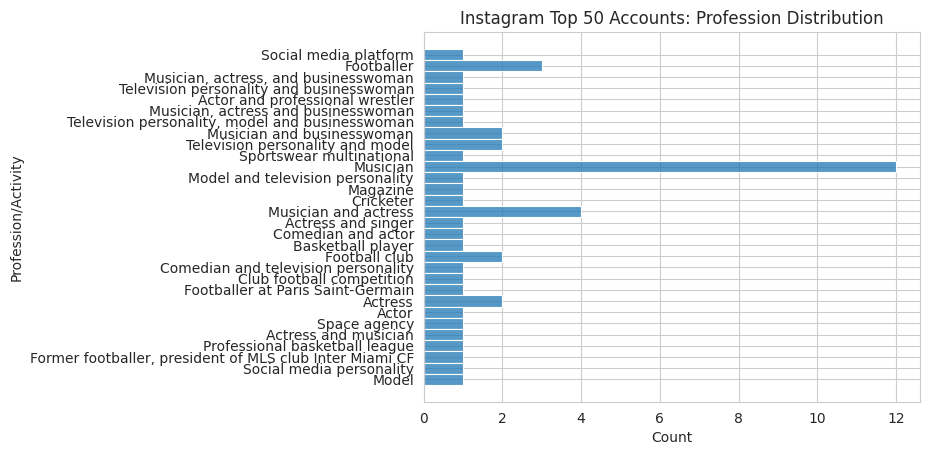

In [39]:
g = sns.histplot(data=ins_top_50, y='Profession/Activity')
g.set_title('Instagram Top 50 Accounts: Profession Distribution')
plt.show()

In [40]:
ins_top_50['Country'].value_counts()

United States                        28
India                                 3
Canada                                2
Spain                                 2
Israel                                1
South Korea                           1
United Kingdom                        1
United States Canada                  1
Colombia                              1
United Kingdom Albania                1
Thailand                              1
Europe                                1
France                                1
Portugal                              1
Barbados                              1
Brazil                                1
Trinidad and Tobago United States     1
Argentina                             1
Italy Senegal                         1
Name: Country, dtype: int64

In [41]:
twitter_top_50 = pd.read_csv('twitter_top_50_2023-07-03.csv')
twitter_top_50

,Rank,Username,Owner,Followers (millions),Description,Country
0,1,@ElonMusk,Elon Musk,145.0,Business magnate and owner of Twitter,United States
1,2,@BarackObama,Barack Obama,132.2,44th President of the United States,United States
2,3,@justinbieber,Justin Bieber,112.1,Musician,Canada
3,4,@Cristiano,Cristiano Ronaldo,108.7,Football player,Portugal
4,5,@rihanna,Rihanna,108.1,Musician,Barbados
5,6,@katyperry,Katy Perry,107.4,Musician,United States
6,7,@taylorswift13,Taylor Swift,93.0,Musician,United States
7,8,@narendramodi,Narendra Modi,89.5,Prime Minister of India,India
8,9,@realDonaldTrump,Donald Trump,86.7,45th President of the United States,United States
9,10,@ladygaga,Lady Gaga,84.1,Musician and actress,United States


In [42]:
twitter_top_50['Description'].value_counts()

Musician                                    8
Musician and actress                        5
News channel                                4
Actor                                       4
Football player                             2
Sports channel                              2
Football club                               2
Comedian and television host                2
Television personality and businesswoman    2
Musicians                                   2
Football league                             2
Business magnate and owner of Twitter       1
Newspaper                                   1
Basketball league                           1
Basketball player                           1
Office of the Prime Minister of India       1
Businessman and philanthropist              1
Cricket player                              1
Musician and actor                          1
44th President of the United States         1
Operator of platform                        1
Space agency                      

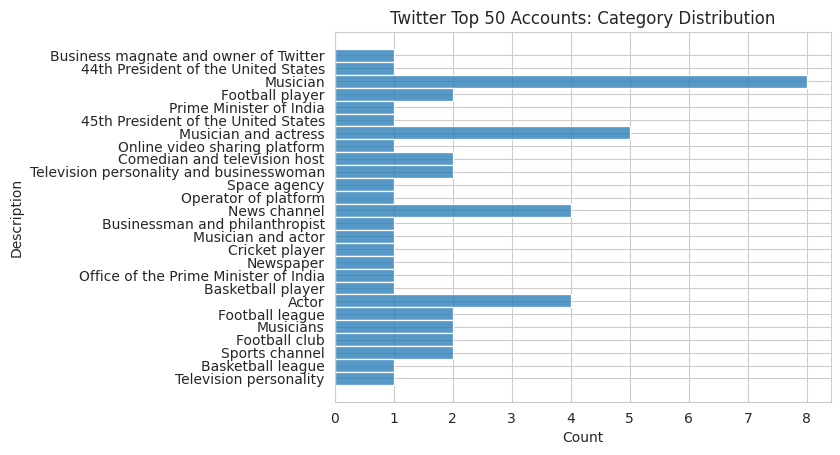

In [43]:
g = sns.histplot(data=twitter_top_50, y='Description')

g.set_title('Twitter Top 50 Accounts: Category Distribution')

plt.show()

In [44]:
twitter_top_50['Country'].value_counts()

United States           28
India                    7
United Kingdom           2
South Korea              2
Spain                    2
Canada                   1
Portugal                 1
Barbados                 1
Brazil                   1
Colombia                 1
Europe                   1
United States Canada     1
Ireland                  1
England Wales            1
Name: Country, dtype: int64

In [45]:
ytb_top_50 = pd.read_csv('youtube_top_50_2023-07-03.csv')
ytb_top_50

,Rank,Name,Link,Subscribers (millions),Primary language,Category,Country
0,1,T-Series,Link,245.0,Hindi[7][8],Music and film,India
1,2,MrBeast,Link,164.0,English,Entertainment,United States
2,3,Cocomelon,Link,161.0,English,Education,United States
3,4,Sony Entertainment Television India,Link,158.0,Hindi[9],Entertainment,India
4,5,Kids Diana Show,Link,112.0,English[10][11][12],Entertainment,Ukraine
5,6,PewDiePie,Link,111.0,English,Entertainment,Sweden
6,7,Like Nastya,Link,106.0,English,Entertainment,Russia- United States
7,8,Vlad and Niki,Link,98.7,English,Entertainment,Russia
8,9,Zee Music Company,Link,96.2,Hindi[13][14],Music,India
9,10,WWE,Link,95.7,English,Sports,United States


In [46]:
ytb_top_50['Primary language'].value_counts()

English                19
Hindi                  14
Spanish                 5
Korean                  3
Russian                 2
Hindi[7][8]             1
Hindi[9]                1
English[10][11][12]     1
Hindi[13][14]           1
Portuguese              1
Hindi[16]               1
Bhojpuri                1
Name: Primary language, dtype: int64

In [47]:
ytb_top_50['Category'].value_counts()

Music             21
Entertainment     17
Education          4
Sports             2
Film               2
Music and film     1
How-to             1
News               1
Games              1
Name: Category, dtype: int64

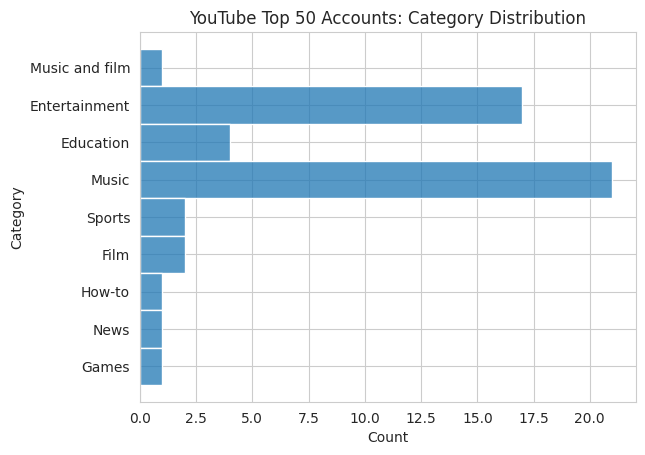

In [48]:
g = sns.histplot(data=ytb_top_50, y='Category')

g.set_title('YouTube Top 50 Accounts: Category Distribution')

plt.show()

In [49]:
ytb_top_50['Country'].value_counts()

India                           19
United States                   11
South Korea                      4
Russia                           2
Romania                          1
El Salvador                      1
Belarus                          1
Mexico                           1
Chile                            1
United Kingdom                   1
Brazil                           1
Argentina                        1
Canada                           1
Cyprus[a]                        1
Russia- United States            1
Sweden                           1
Ukraine                          1
United States ( Puerto Rico)     1
Name: Country, dtype: int64

In [50]:
ytb_engagement = pd.read_csv('YouTubeDataset_withChannelElapsed.csv')
ytb_engagement

,index,totalviews/channelelapsedtime,channelId,videoCategoryId,channelViewCount,likes/subscriber,views/subscribers,videoCount,subscriberCount,videoId,...,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
0,0,0.165199,UCdzU3DSGzyWzN2118yd9X9g,22,14654,0.555556,95.111111,30,18,--DwgB78t-c,...,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19T18:38:28.000Z,0
1,1,1.133820,UC0UnhAG47DRyVZGVcbhAXhQ,10,105909,0.239130,59.326087,51,184,--NZRkXBV7k,...,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30T04:04:40.000Z,2
2,2,0.668120,UCXjtAvK5P3wXBGh0vbGylzg,27,48265,0.023669,10.289941,72,338,--hoQ2sGG4M,...,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07T06:51:10.000Z,2
3,3,25.653505,UCeKHMeUlcLNPLCLUfZUQI2w,26,2116722,0.007301,0.884178,172,22051,--sBoaqBlzA,...,0.000513,12306.523256,54096,161,6,0.000272,95.992109,0.360415,2011-08-04T01:07:38.000Z,10
4,4,52.773778,UCNWPDyaWf2eAHnofFLSnEMg,20,1649075,0.004545,10.004545,2777,220,--7h1S4neDM,...,0.000000,593.833273,30120,1,0,0.000000,7495.795455,0.073074,2014-04-29T15:44:44.000Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575605,575605,259.123802,UCoBsEPCif0cJr0XoH9vKVsA,10,25342567,0.011829,2.577992,3783,7270,2YwZKSyX5Pg,...,0.000534,6699.066085,49752,86,2,0.000275,3485.910179,0.376708,2012-02-01T04:01:17.000Z,10
575606,575606,0.322689,UC2AFyZm1gI81faexxhq5Mzg,2,30599,2.333333,4989.000000,15,3,2Y8Rtvd8cHc,...,-1.000000,2039.933333,93745,7,2,0.666667,10199.666667,0.159657,2007-01-25T14:38:49.000Z,-1
575607,575607,2.174518,UCXRQyRCOq8SwupXXqQ3mgAA,28,103855,0.227273,276.909091,61,22,2YhOrl3fzCM,...,0.000164,1702.540984,41496,5,9,0.409091,4720.681818,0.146809,2013-01-10T07:20:03.000Z,1
575608,575608,5.044453,UCtWqVyrfT_CrVeNx0UM4RjQ,24,363927,0.069519,10.331551,258,187,2Y3a5eS_q2s,...,0.002070,1410.569767,38352,13,1,0.005348,1946.133690,0.050375,2013-05-20T18:33:03.000Z,4


In [51]:
ytb_engagement = ytb_engagement.drop(columns=['channelId','videoCategoryId','videoId','channelViewCount','channelelapsedtime','totalviews/channelelapsedtime','channelCommentCount','videoViewCount'])

In [52]:
ytb_engagement = ytb_engagement.rename(columns={'index':'Channel_Num'})
ytb_engagement

,Channel_Num,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,comments/subscriber,likes/views,likes/dislikes,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
0,0,0.555556,95.111111,30,18,0.000584,0.000000,0.005841,-2.0,0.000000,488.466667,50040,10,1,0.055556,814.111111,0.034213,2012-01-19T18:38:28.000Z,0
1,1,0.239130,59.326087,51,184,0.000275,0.010870,0.004031,-2.0,0.000183,2076.647059,22080,44,3,0.016304,575.592391,0.494384,2015-03-30T04:04:40.000Z,2
2,2,0.023669,10.289941,72,338,0.000288,0.005917,0.002300,-2.0,0.000575,670.347222,71544,8,1,0.002959,142.795858,0.048613,2009-08-07T06:51:10.000Z,2
3,3,0.007301,0.884178,172,22051,0.000308,0.000453,0.008258,-2.0,0.000513,12306.523256,54096,161,6,0.000272,95.992109,0.360415,2011-08-04T01:07:38.000Z,10
4,4,0.004545,10.004545,2777,220,0.000000,0.000000,0.000454,-2.0,0.000000,593.833273,30120,1,0,0.000000,7495.795455,0.073074,2014-04-29T15:44:44.000Z,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575605,575605,0.011829,2.577992,3783,7270,0.000107,0.001376,0.004589,-2.0,0.000534,6699.066085,49752,86,2,0.000275,3485.910179,0.376708,2012-02-01T04:01:17.000Z,10
575606,575606,2.333333,4989.000000,15,3,0.000134,-1.000000,0.000468,-2.0,-1.000000,2039.933333,93745,7,2,0.666667,10199.666667,0.159657,2007-01-25T14:38:49.000Z,-1
575607,575607,0.227273,276.909091,61,22,0.001477,0.045455,0.000821,-2.0,0.000164,1702.540984,41496,5,9,0.409091,4720.681818,0.146809,2013-01-10T07:20:03.000Z,1
575608,575608,0.069519,10.331551,258,187,0.000518,0.021390,0.006729,-2.0,0.002070,1410.569767,38352,13,1,0.005348,1946.133690,0.050375,2013-05-20T18:33:03.000Z,4


In [53]:
ytb_engagement.dtypes

Channel_Num               int64
likes/subscriber        float64
views/subscribers       float64
videoCount                int64
subscriberCount           int64
dislikes/views          float64
comments/subscriber     float64
likes/views             float64
likes/dislikes          float64
comments/views          float64
totvideos/videocount    float64
elapsedtime               int64
videoLikeCount            int64
videoDislikeCount         int64
dislikes/subscriber     float64
totviews/totsubs        float64
views/elapsedtime       float64
videoPublished           object
VideoCommentCount         int64
dtype: object

In [54]:
ytb_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575610 entries, 0 to 575609
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Channel_Num           575610 non-null  int64  
 1   likes/subscriber      575610 non-null  float64
 2   views/subscribers     575610 non-null  float64
 3   videoCount            575610 non-null  int64  
 4   subscriberCount       575610 non-null  int64  
 5   dislikes/views        575610 non-null  float64
 6   comments/subscriber   575610 non-null  float64
 7   likes/views           575610 non-null  float64
 8   likes/dislikes        575610 non-null  float64
 9   comments/views        575610 non-null  float64
 10  totvideos/videocount  575610 non-null  float64
 11  elapsedtime           575610 non-null  int64  
 12  videoLikeCount        575610 non-null  int64  
 13  videoDislikeCount     575610 non-null  int64  
 14  dislikes/subscriber   575610 non-null  float64
 15  

In [55]:
ytb_engagement.isna().sum()

Channel_Num             0
likes/subscriber        0
views/subscribers       0
videoCount              0
subscriberCount         0
dislikes/views          0
comments/subscriber     0
likes/views             0
likes/dislikes          0
comments/views          0
totvideos/videocount    0
elapsedtime             0
videoLikeCount          0
videoDislikeCount       0
dislikes/subscriber     0
totviews/totsubs        0
views/elapsedtime       0
videoPublished          0
VideoCommentCount       0
dtype: int64

In [56]:
ytb_engagement = ytb_engagement.sort_values('subscriberCount',ascending=False)
ytb_engagement

,Channel_Num,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,comments/subscriber,likes/views,likes/dislikes,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
484798,484798,0.000007,0.003989,11445,25253114,0.000357,7.919815e-08,0.001767,-2.000000,0.000020,2.079351e+06,55704,178,36,1.425567e-06,942.385665,1.808308,2011-05-29T00:26:55.000Z,2
493692,493692,0.000090,0.059426,11445,25252292,0.000349,1.259292e-05,0.001507,4.316794,0.000212,2.079351e+06,55800,2262,524,2.075059e-05,942.416342,26.893262,2011-05-25T01:17:41.000Z,318
196762,196762,0.000003,0.001037,11445,25251402,0.000535,3.168141e-07,0.003209,-2.000000,0.000306,2.079351e+06,51024,84,14,5.544247e-07,942.449558,0.513033,2011-12-10T16:30:10.000Z,8
246969,246969,0.000004,0.002015,11445,25250603,0.000236,2.772211e-07,0.001769,-2.000000,0.000138,2.079351e+06,55680,90,12,4.752362e-07,942.479379,0.913937,2011-05-30T09:06:31.000Z,7
172005,172005,0.001012,0.325603,11445,25250221,0.000143,3.330664e-05,0.003109,21.807167,0.000102,2.079351e+06,39384,25558,1172,4.641544e-05,942.493638,208.753580,2013-04-08T11:31:04.000Z,841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163930,163930,-1.000000,-1.000000,3,0,0.001811,-1.000000e+00,0.000604,-2.000000,0.000000,1.771667e+03,71616,3,9,-1.000000e+00,-1.000000,0.069412,2009-08-04T12:03:19.000Z,0
163934,163934,-1.000000,-1.000000,2,0,0.000000,-1.000000e+00,0.005811,-2.000000,0.001826,3.091000e+03,27960,35,0,-1.000000e+00,-1.000000,0.215415,2014-07-28T14:56:25.000Z,11
225731,225731,-1.000000,-1.000000,8,0,0.000238,-1.000000e+00,0.005639,-2.000000,0.001430,3.534500e+03,24840,71,3,-1.000000e+00,-1.000000,0.506844,2014-12-05T15:05:58.000Z,18
305600,305600,-1.000000,-1.000000,3,0,0.000000,-1.000000e+00,0.002761,-2.000000,0.000000,5.026667e+02,68592,4,0,-1.000000e+00,-1.000000,0.021125,2009-12-08T12:50:30.000Z,0


In [57]:
import datetime as dt

In [58]:
ytb_engagement['videoPublished'] = ytb_engagement['videoPublished'].str.replace('.000Z','')

<ipython-input-58-ede28982d323>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ytb_engagement['videoPublished'] = ytb_engagement['videoPublished'].str.replace('.000Z','')


In [59]:
ytb_engagement

,Channel_Num,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,comments/subscriber,likes/views,likes/dislikes,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
484798,484798,0.000007,0.003989,11445,25253114,0.000357,7.919815e-08,0.001767,-2.000000,0.000020,2.079351e+06,55704,178,36,1.425567e-06,942.385665,1.808308,2011-05-29T00:26:55,2
493692,493692,0.000090,0.059426,11445,25252292,0.000349,1.259292e-05,0.001507,4.316794,0.000212,2.079351e+06,55800,2262,524,2.075059e-05,942.416342,26.893262,2011-05-25T01:17:41,318
196762,196762,0.000003,0.001037,11445,25251402,0.000535,3.168141e-07,0.003209,-2.000000,0.000306,2.079351e+06,51024,84,14,5.544247e-07,942.449558,0.513033,2011-12-10T16:30:10,8
246969,246969,0.000004,0.002015,11445,25250603,0.000236,2.772211e-07,0.001769,-2.000000,0.000138,2.079351e+06,55680,90,12,4.752362e-07,942.479379,0.913937,2011-05-30T09:06:31,7
172005,172005,0.001012,0.325603,11445,25250221,0.000143,3.330664e-05,0.003109,21.807167,0.000102,2.079351e+06,39384,25558,1172,4.641544e-05,942.493638,208.753580,2013-04-08T11:31:04,841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163930,163930,-1.000000,-1.000000,3,0,0.001811,-1.000000e+00,0.000604,-2.000000,0.000000,1.771667e+03,71616,3,9,-1.000000e+00,-1.000000,0.069412,2009-08-04T12:03:19,0
163934,163934,-1.000000,-1.000000,2,0,0.000000,-1.000000e+00,0.005811,-2.000000,0.001826,3.091000e+03,27960,35,0,-1.000000e+00,-1.000000,0.215415,2014-07-28T14:56:25,11
225731,225731,-1.000000,-1.000000,8,0,0.000238,-1.000000e+00,0.005639,-2.000000,0.001430,3.534500e+03,24840,71,3,-1.000000e+00,-1.000000,0.506844,2014-12-05T15:05:58,18
305600,305600,-1.000000,-1.000000,3,0,0.000000,-1.000000e+00,0.002761,-2.000000,0.000000,5.026667e+02,68592,4,0,-1.000000e+00,-1.000000,0.021125,2009-12-08T12:50:30,0


In [60]:
ytb_engagement['videoPublished'] = ytb_engagement['videoPublished'].str.replace(r'T.*','')

<ipython-input-60-fa963fd3128a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ytb_engagement['videoPublished'] = ytb_engagement['videoPublished'].str.replace(r'T.*','')


In [61]:
ytb_engagement

,Channel_Num,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,comments/subscriber,likes/views,likes/dislikes,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
484798,484798,0.000007,0.003989,11445,25253114,0.000357,7.919815e-08,0.001767,-2.000000,0.000020,2.079351e+06,55704,178,36,1.425567e-06,942.385665,1.808308,2011-05-29,2
493692,493692,0.000090,0.059426,11445,25252292,0.000349,1.259292e-05,0.001507,4.316794,0.000212,2.079351e+06,55800,2262,524,2.075059e-05,942.416342,26.893262,2011-05-25,318
196762,196762,0.000003,0.001037,11445,25251402,0.000535,3.168141e-07,0.003209,-2.000000,0.000306,2.079351e+06,51024,84,14,5.544247e-07,942.449558,0.513033,2011-12-10,8
246969,246969,0.000004,0.002015,11445,25250603,0.000236,2.772211e-07,0.001769,-2.000000,0.000138,2.079351e+06,55680,90,12,4.752362e-07,942.479379,0.913937,2011-05-30,7
172005,172005,0.001012,0.325603,11445,25250221,0.000143,3.330664e-05,0.003109,21.807167,0.000102,2.079351e+06,39384,25558,1172,4.641544e-05,942.493638,208.753580,2013-04-08,841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163930,163930,-1.000000,-1.000000,3,0,0.001811,-1.000000e+00,0.000604,-2.000000,0.000000,1.771667e+03,71616,3,9,-1.000000e+00,-1.000000,0.069412,2009-08-04,0
163934,163934,-1.000000,-1.000000,2,0,0.000000,-1.000000e+00,0.005811,-2.000000,0.001826,3.091000e+03,27960,35,0,-1.000000e+00,-1.000000,0.215415,2014-07-28,11
225731,225731,-1.000000,-1.000000,8,0,0.000238,-1.000000e+00,0.005639,-2.000000,0.001430,3.534500e+03,24840,71,3,-1.000000e+00,-1.000000,0.506844,2014-12-05,18
305600,305600,-1.000000,-1.000000,3,0,0.000000,-1.000000e+00,0.002761,-2.000000,0.000000,5.026667e+02,68592,4,0,-1.000000e+00,-1.000000,0.021125,2009-12-08,0


In [62]:
ytb_engagement['videoPublished'] = pd.to_datetime(ytb_engagement['videoPublished'])

In [63]:
ytb_engagement.dtypes

Channel_Num                      int64
likes/subscriber               float64
views/subscribers              float64
videoCount                       int64
subscriberCount                  int64
dislikes/views                 float64
comments/subscriber            float64
likes/views                    float64
likes/dislikes                 float64
comments/views                 float64
totvideos/videocount           float64
elapsedtime                      int64
videoLikeCount                   int64
videoDislikeCount                int64
dislikes/subscriber            float64
totviews/totsubs               float64
views/elapsedtime              float64
videoPublished          datetime64[ns]
VideoCommentCount                int64
dtype: object

In [64]:
ytb_engagement = ytb_engagement.sort_values('subscriberCount',ascending=False)

ytb_engagement

,Channel_Num,likes/subscriber,views/subscribers,videoCount,subscriberCount,dislikes/views,comments/subscriber,likes/views,likes/dislikes,comments/views,totvideos/videocount,elapsedtime,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,VideoCommentCount
484798,484798,0.000007,0.003989,11445,25253114,0.000357,7.919815e-08,0.001767,-2.000000,0.000020,2.079351e+06,55704,178,36,1.425567e-06,942.385665,1.808308,2011-05-29,2
493692,493692,0.000090,0.059426,11445,25252292,0.000349,1.259292e-05,0.001507,4.316794,0.000212,2.079351e+06,55800,2262,524,2.075059e-05,942.416342,26.893262,2011-05-25,318
196762,196762,0.000003,0.001037,11445,25251402,0.000535,3.168141e-07,0.003209,-2.000000,0.000306,2.079351e+06,51024,84,14,5.544247e-07,942.449558,0.513033,2011-12-10,8
246969,246969,0.000004,0.002015,11445,25250603,0.000236,2.772211e-07,0.001769,-2.000000,0.000138,2.079351e+06,55680,90,12,4.752362e-07,942.479379,0.913937,2011-05-30,7
172005,172005,0.001012,0.325603,11445,25250221,0.000143,3.330664e-05,0.003109,21.807167,0.000102,2.079351e+06,39384,25558,1172,4.641544e-05,942.493638,208.753580,2013-04-08,841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359526,359526,-1.000000,-1.000000,5,0,0.000000,-1.000000e+00,0.001356,-2.000000,0.000452,2.339200e+03,81000,3,0,-1.000000e+00,-1.000000,0.027321,2008-07-09,1
447869,447869,-1.000000,-1.000000,381,0,0.000000,-1.000000e+00,0.006325,-2.000000,0.000000,3.883530e+03,48000,9,0,-1.000000e+00,-1.000000,0.029646,2012-04-13,0
490752,490752,-1.000000,-1.000000,24,0,0.000298,-1.000000e+00,0.001811,6.070974,0.000072,2.502684e+05,29040,6672,1099,-1.000000e+00,-1.000000,126.884848,2014-06-13,267
137482,137482,-1.000000,-1.000000,122,0,0.000000,-1.000000e+00,0.001880,-2.000000,0.001128,2.206377e+03,56448,5,0,-1.000000e+00,-1.000000,0.047105,2011-04-28,3


In [65]:
ytb_engagement['likes'] = ytb_engagement['likes/subscriber'] * ytb_engagement['subscriberCount']

ytb_engagement['dislikes'] = ytb_engagement['dislikes/subscriber'] * ytb_engagement['subscriberCount']

ytb_engagement['views'] = ytb_engagement['views/subscribers'] * ytb_engagement['subscriberCount']

In [66]:
ytb_engagement.dtypes

Channel_Num                      int64
likes/subscriber               float64
views/subscribers              float64
videoCount                       int64
subscriberCount                  int64
dislikes/views                 float64
comments/subscriber            float64
likes/views                    float64
likes/dislikes                 float64
comments/views                 float64
totvideos/videocount           float64
elapsedtime                      int64
videoLikeCount                   int64
videoDislikeCount                int64
dislikes/subscriber            float64
totviews/totsubs               float64
views/elapsedtime              float64
videoPublished          datetime64[ns]
VideoCommentCount                int64
likes                          float64
dislikes                       float64
views                          float64
dtype: object

In [67]:
ytb_engagement = ytb_engagement.rename(columns={'VideoCommentCount':'Comments'})

In [68]:
ytb_engagement = ytb_engagement.rename(columns={'subscriberCount':'Subscribers'})

In [69]:
ytb_engagement

,Channel_Num,likes/subscriber,views/subscribers,videoCount,Subscribers,dislikes/views,comments/subscriber,likes/views,likes/dislikes,comments/views,...,videoLikeCount,videoDislikeCount,dislikes/subscriber,totviews/totsubs,views/elapsedtime,videoPublished,Comments,likes,dislikes,views
484798,484798,0.000007,0.003989,11445,25253114,0.000357,7.919815e-08,0.001767,-2.000000,0.000020,...,178,36,1.425567e-06,942.385665,1.808308,2011-05-29,2,178.0,36.0,100730.0
493692,493692,0.000090,0.059426,11445,25252292,0.000349,1.259292e-05,0.001507,4.316794,0.000212,...,2262,524,2.075059e-05,942.416342,26.893262,2011-05-25,318,2262.0,524.0,1500644.0
196762,196762,0.000003,0.001037,11445,25251402,0.000535,3.168141e-07,0.003209,-2.000000,0.000306,...,84,14,5.544247e-07,942.449558,0.513033,2011-12-10,8,84.0,14.0,26177.0
246969,246969,0.000004,0.002015,11445,25250603,0.000236,2.772211e-07,0.001769,-2.000000,0.000138,...,90,12,4.752362e-07,942.479379,0.913937,2011-05-30,7,90.0,12.0,50888.0
172005,172005,0.001012,0.325603,11445,25250221,0.000143,3.330664e-05,0.003109,21.807167,0.000102,...,25558,1172,4.641544e-05,942.493638,208.753580,2013-04-08,841,25558.0,1172.0,8221551.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359526,359526,-1.000000,-1.000000,5,0,0.000000,-1.000000e+00,0.001356,-2.000000,0.000452,...,3,0,-1.000000e+00,-1.000000,0.027321,2008-07-09,1,-0.0,-0.0,-0.0
447869,447869,-1.000000,-1.000000,381,0,0.000000,-1.000000e+00,0.006325,-2.000000,0.000000,...,9,0,-1.000000e+00,-1.000000,0.029646,2012-04-13,0,-0.0,-0.0,-0.0
490752,490752,-1.000000,-1.000000,24,0,0.000298,-1.000000e+00,0.001811,6.070974,0.000072,...,6672,1099,-1.000000e+00,-1.000000,126.884848,2014-06-13,267,-0.0,-0.0,-0.0
137482,137482,-1.000000,-1.000000,122,0,0.000000,-1.000000e+00,0.001880,-2.000000,0.001128,...,5,0,-1.000000e+00,-1.000000,0.047105,2011-04-28,3,-0.0,-0.0,-0.0


In [70]:
ytb_engagement.dtypes

Channel_Num                      int64
likes/subscriber               float64
views/subscribers              float64
videoCount                       int64
Subscribers                      int64
dislikes/views                 float64
comments/subscriber            float64
likes/views                    float64
likes/dislikes                 float64
comments/views                 float64
totvideos/videocount           float64
elapsedtime                      int64
videoLikeCount                   int64
videoDislikeCount                int64
dislikes/subscriber            float64
totviews/totsubs               float64
views/elapsedtime              float64
videoPublished          datetime64[ns]
Comments                         int64
likes                          float64
dislikes                       float64
views                          float64
dtype: object

In [71]:
ytb_engagement = ytb_engagement[['videoPublished','Channel_Num','Subscribers','videoCount','elapsedtime','views','views/elapsedtime','views/subscribers','totvideos/videocount','totviews/totsubs','likes','likes/subscriber','likes/views','dislikes','dislikes/subscriber','dislikes/views','Comments','comments/subscriber','comments/views']]

In [72]:
ytb_engagement = ytb_engagement.drop(columns=['totvideos/videocount','totviews/totsubs'])

ytb_engagement

,videoPublished,Channel_Num,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
484798,2011-05-29,484798,25253114,11445,55704,100730.0,1.808308,0.003989,178.0,0.000007,0.001767,36.0,1.425567e-06,0.000357,2,7.919815e-08,0.000020
493692,2011-05-25,493692,25252292,11445,55800,1500644.0,26.893262,0.059426,2262.0,0.000090,0.001507,524.0,2.075059e-05,0.000349,318,1.259292e-05,0.000212
196762,2011-12-10,196762,25251402,11445,51024,26177.0,0.513033,0.001037,84.0,0.000003,0.003209,14.0,5.544247e-07,0.000535,8,3.168141e-07,0.000306
246969,2011-05-30,246969,25250603,11445,55680,50888.0,0.913937,0.002015,90.0,0.000004,0.001769,12.0,4.752362e-07,0.000236,7,2.772211e-07,0.000138
172005,2013-04-08,172005,25250221,11445,39384,8221551.0,208.753580,0.325603,25558.0,0.001012,0.003109,1172.0,4.641544e-05,0.000143,841,3.330664e-05,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359526,2008-07-09,359526,0,5,81000,-0.0,0.027321,-1.000000,-0.0,-1.000000,0.001356,-0.0,-1.000000e+00,0.000000,1,-1.000000e+00,0.000452
447869,2012-04-13,447869,0,381,48000,-0.0,0.029646,-1.000000,-0.0,-1.000000,0.006325,-0.0,-1.000000e+00,0.000000,0,-1.000000e+00,0.000000
490752,2014-06-13,490752,0,24,29040,-0.0,126.884848,-1.000000,-0.0,-1.000000,0.001811,-0.0,-1.000000e+00,0.000298,267,-1.000000e+00,0.000072
137482,2011-04-28,137482,0,122,56448,-0.0,0.047105,-1.000000,-0.0,-1.000000,0.001880,-0.0,-1.000000e+00,0.000000,3,-1.000000e+00,0.001128


In [73]:
ytb_engagement = ytb_engagement.reset_index()

In [74]:
ytb_engagement = ytb_engagement.drop(columns=['videoPublished']).set_index('Channel_Num')

ytb_engagement

,index,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,,
484798,484798,25253114,11445,55704,100730.0,1.808308,0.003989,178.0,0.000007,0.001767,36.0,1.425567e-06,0.000357,2,7.919815e-08,0.000020
493692,493692,25252292,11445,55800,1500644.0,26.893262,0.059426,2262.0,0.000090,0.001507,524.0,2.075059e-05,0.000349,318,1.259292e-05,0.000212
196762,196762,25251402,11445,51024,26177.0,0.513033,0.001037,84.0,0.000003,0.003209,14.0,5.544247e-07,0.000535,8,3.168141e-07,0.000306
246969,246969,25250603,11445,55680,50888.0,0.913937,0.002015,90.0,0.000004,0.001769,12.0,4.752362e-07,0.000236,7,2.772211e-07,0.000138
172005,172005,25250221,11445,39384,8221551.0,208.753580,0.325603,25558.0,0.001012,0.003109,1172.0,4.641544e-05,0.000143,841,3.330664e-05,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359526,359526,0,5,81000,-0.0,0.027321,-1.000000,-0.0,-1.000000,0.001356,-0.0,-1.000000e+00,0.000000,1,-1.000000e+00,0.000452
447869,447869,0,381,48000,-0.0,0.029646,-1.000000,-0.0,-1.000000,0.006325,-0.0,-1.000000e+00,0.000000,0,-1.000000e+00,0.000000
490752,490752,0,24,29040,-0.0,126.884848,-1.000000,-0.0,-1.000000,0.001811,-0.0,-1.000000e+00,0.000298,267,-1.000000e+00,0.000072


In [75]:
ytb_engagement = ytb_engagement.drop(columns='index')

ytb_engagement

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,
484798,25253114,11445,55704,100730.0,1.808308,0.003989,178.0,0.000007,0.001767,36.0,1.425567e-06,0.000357,2,7.919815e-08,0.000020
493692,25252292,11445,55800,1500644.0,26.893262,0.059426,2262.0,0.000090,0.001507,524.0,2.075059e-05,0.000349,318,1.259292e-05,0.000212
196762,25251402,11445,51024,26177.0,0.513033,0.001037,84.0,0.000003,0.003209,14.0,5.544247e-07,0.000535,8,3.168141e-07,0.000306
246969,25250603,11445,55680,50888.0,0.913937,0.002015,90.0,0.000004,0.001769,12.0,4.752362e-07,0.000236,7,2.772211e-07,0.000138
172005,25250221,11445,39384,8221551.0,208.753580,0.325603,25558.0,0.001012,0.003109,1172.0,4.641544e-05,0.000143,841,3.330664e-05,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359526,0,5,81000,-0.0,0.027321,-1.000000,-0.0,-1.000000,0.001356,-0.0,-1.000000e+00,0.000000,1,-1.000000e+00,0.000452
447869,0,381,48000,-0.0,0.029646,-1.000000,-0.0,-1.000000,0.006325,-0.0,-1.000000e+00,0.000000,0,-1.000000e+00,0.000000
490752,0,24,29040,-0.0,126.884848,-1.000000,-0.0,-1.000000,0.001811,-0.0,-1.000000e+00,0.000298,267,-1.000000e+00,0.000072


In [76]:
ytb_engagement.dtypes

Subscribers              int64
videoCount               int64
elapsedtime              int64
views                  float64
views/elapsedtime      float64
views/subscribers      float64
likes                  float64
likes/subscriber       float64
likes/views            float64
dislikes               float64
dislikes/subscriber    float64
dislikes/views         float64
Comments                 int64
comments/subscriber    float64
comments/views         float64
dtype: object

In [77]:
ytb_engagement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575610 entries, 484798 to 104660
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Subscribers          575610 non-null  int64  
 1   videoCount           575610 non-null  int64  
 2   elapsedtime          575610 non-null  int64  
 3   views                575610 non-null  float64
 4   views/elapsedtime    575610 non-null  float64
 5   views/subscribers    575610 non-null  float64
 6   likes                575610 non-null  float64
 7   likes/subscriber     575610 non-null  float64
 8   likes/views          575610 non-null  float64
 9   dislikes             575610 non-null  float64
 10  dislikes/subscriber  575610 non-null  float64
 11  dislikes/views       575610 non-null  float64
 12  Comments             575610 non-null  int64  
 13  comments/subscriber  575610 non-null  float64
 14  comments/views       575610 non-null  float64
dtypes: float64(1

In [78]:
ytb_engagement.describe()

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
count,5.756100e+05,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,5.756100e+05,575610.000000,575610.000000,575610.000000,575610.000000,575610.000000
mean,8.097598e+04,1204.464627,50755.786958,5.807574e+04,1.517436,308.993792,-8.868658e+02,0.562041,-0.013684,-1.158062e+03,0.074623,-0.019370,39.082997,0.139804,-0.019404
std,6.033393e+05,8303.754974,19725.560307,1.225104e+06,31.451958,1584.321770,6.193873e+04,2.804067,0.141140,6.177109e+04,1.264975,0.139794,557.811895,1.485730,0.143906
min,0.000000e+00,0.000000,17520.000000,-2.134328e+06,-0.000051,-1.000000,-9.490347e+06,-1.000000,-1.000000,-9.490347e+06,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.800000e+01,17.000000,34656.000000,2.087000e+03,0.045762,0.919155,5.000000e+00,0.002832,0.001304,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000062
50%,4.080000e+02,70.000000,48480.000000,4.629000e+03,0.106729,11.767535,1.600000e+01,0.029412,0.002932,1.000000e+00,0.000268,0.000176,4.000000,0.002498,0.000541
75%,5.319000e+03,336.000000,65424.000000,1.489400e+04,0.347067,120.648028,5.800000e+01,0.273810,0.006357,5.000000e+00,0.013707,0.000554,14.000000,0.045455,0.001579
max,2.525311e+07,415500.000000,106609.000000,5.008939e+08,11698.756213,279803.000000,1.240473e+06,505.000000,1.418500,2.442800e+05,343.500000,0.322981,191498.000000,485.000000,1.003530


In [79]:
ytb_engagement[ytb_engagement['videoCount'] == ytb_engagement['videoCount'].max()]

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,
183547,9399,415500,50784,1223.0,0.024082,0.130120,0.0,0.000000,0.000000,0.0,0.000000,0.000000,-1,-1.0,-1.0
226834,9399,415500,24000,5166.0,0.215250,0.549633,18.0,0.001915,0.003484,1.0,0.000106,0.000194,-1,-1.0,-1.0


In [80]:
ytb_engagement[ytb_engagement['likes/subscriber'] == ytb_engagement['likes/subscriber'].max()]

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,
397430,1,1,65280,121316.0,1.858395,121316.0,505.0,505.0,0.004163,1.0,1.0,0.000008,0,0.0,0.0


In [81]:
ytb_engagement[ytb_engagement['dislikes/subscriber'] == ytb_engagement['dislikes/subscriber'].max()]

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,
102101,2,1,83448,24050.0,0.288203,12025.0,178.0,89.0,0.007401,687.0,343.5,0.028565,970,485.0,0.040333


In [82]:
ytb_engagement[ytb_engagement['views/subscribers'] == ytb_engagement['views/subscribers'].max()]

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,
171400,1,6,43008,279803.0,6.505836,279803.0,209.0,209.0,0.000747,2.0,2.0,0.000007,0,0.0,0.0


In [83]:
ytb_engagement[ytb_engagement['Comments'] == ytb_engagement['Comments'].max()]

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,
312253,22732933,907,43296,84495834.0,1951.585227,3.716891,953651.0,0.04195,0.011286,28792.0,0.001267,0.000341,191498,0.008424,0.002266


In [84]:
ytb_engagement[ytb_engagement['comments/subscriber'] == ytb_engagement['comments/subscriber'].max()]

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,
102101,2,1,83448,24050.0,0.288203,12025.0,178.0,89.0,0.007401,687.0,343.5,0.028565,970,485.0,0.040333


In [85]:
ytb_engagement

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,
484798,25253114,11445,55704,100730.0,1.808308,0.003989,178.0,0.000007,0.001767,36.0,1.425567e-06,0.000357,2,7.919815e-08,0.000020
493692,25252292,11445,55800,1500644.0,26.893262,0.059426,2262.0,0.000090,0.001507,524.0,2.075059e-05,0.000349,318,1.259292e-05,0.000212
196762,25251402,11445,51024,26177.0,0.513033,0.001037,84.0,0.000003,0.003209,14.0,5.544247e-07,0.000535,8,3.168141e-07,0.000306
246969,25250603,11445,55680,50888.0,0.913937,0.002015,90.0,0.000004,0.001769,12.0,4.752362e-07,0.000236,7,2.772211e-07,0.000138
172005,25250221,11445,39384,8221551.0,208.753580,0.325603,25558.0,0.001012,0.003109,1172.0,4.641544e-05,0.000143,841,3.330664e-05,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359526,0,5,81000,-0.0,0.027321,-1.000000,-0.0,-1.000000,0.001356,-0.0,-1.000000e+00,0.000000,1,-1.000000e+00,0.000452
447869,0,381,48000,-0.0,0.029646,-1.000000,-0.0,-1.000000,0.006325,-0.0,-1.000000e+00,0.000000,0,-1.000000e+00,0.000000
490752,0,24,29040,-0.0,126.884848,-1.000000,-0.0,-1.000000,0.001811,-0.0,-1.000000e+00,0.000298,267,-1.000000e+00,0.000072


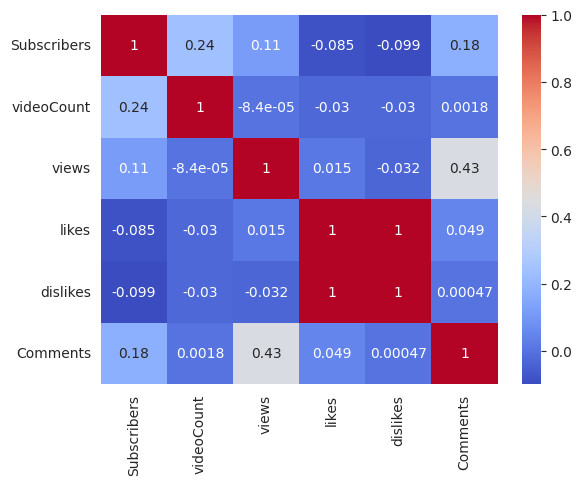

In [86]:
desired_corr = ytb_engagement[['Subscribers','videoCount','views','likes','dislikes','Comments']].corr()

sns.heatmap(desired_corr, annot=True, cmap = 'coolwarm')

plt.show()

In [222]:
ytb_engagement_top_1000 = ytb_engagement.head(1000)

ytb_engagement_top_1000

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,
484798,25253114,11445,55704,100730.0,1.808308,0.003989,178.0,0.000007,0.001767,36.0,1.425567e-06,0.000357,2,7.919815e-08,0.000020
493692,25252292,11445,55800,1500644.0,26.893262,0.059426,2262.0,0.000090,0.001507,524.0,2.075059e-05,0.000349,318,1.259292e-05,0.000212
196762,25251402,11445,51024,26177.0,0.513033,0.001037,84.0,0.000003,0.003209,14.0,5.544247e-07,0.000535,8,3.168141e-07,0.000306
246969,25250603,11445,55680,50888.0,0.913937,0.002015,90.0,0.000004,0.001769,12.0,4.752362e-07,0.000236,7,2.772211e-07,0.000138
172005,25250221,11445,39384,8221551.0,208.753580,0.325603,25558.0,0.001012,0.003109,1172.0,4.641544e-05,0.000143,841,3.330664e-05,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553794,6663337,440,33672,643309.0,19.105162,0.096545,20026.0,0.003005,0.031130,115.0,1.725862e-05,0.000179,403,6.048021e-05,0.000626
553939,6663337,440,33672,643309.0,19.105162,0.096545,20026.0,0.003005,0.031130,115.0,1.725862e-05,0.000179,403,6.048021e-05,0.000626
144817,6616743,1563,32952,242821.0,7.368931,0.036698,13990.0,0.002114,0.057614,115.0,1.738015e-05,0.000474,444,6.710250e-05,0.001829


In [223]:
ytb_small = (ytb_engagement_top_1000['Subscribers'] >= ytb_engagement_top_1000['Subscribers'].quantile(0.25)) & (ytb_engagement_top_1000['Subscribers'] <= ytb_engagement_top_1000['Subscribers'].median())

ytb_medium = (ytb_engagement_top_1000['Subscribers'] >= ytb_engagement_top_1000['Subscribers'].median()) & (ytb_engagement_top_1000['Subscribers'] <= ytb_engagement_top_1000['Subscribers'].quantile(0.75))

ytb_large = ytb_engagement_top_1000['Subscribers'] >= ytb_engagement_top_1000['Subscribers'].quantile(0.75)

ytb_conditions = [ytb_small, ytb_medium, ytb_large]

ytb_subscriber_category = ['ytb_Small', 'ytb_Medium', 'ytb_Large']

ytb_engagement_top_1000['ytb_Subscribers Category'] = np.select(ytb_conditions, ytb_subscriber_category, default='ytb_Less Subscribers')

ytb_engagement_top_1000

<ipython-input-223-abfb87d20317>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytb_engagement_top_1000['ytb_Subscribers Category'] = np.select(ytb_conditions, ytb_subscriber_category, default='ytb_Less Subscribers')


,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views,ytb_Subscribers Category
Channel_Num,,,,,,,,,,,,,,,,
484798,25253114,11445,55704,100730.0,1.808308,0.003989,178.0,0.000007,0.001767,36.0,1.425567e-06,0.000357,2,7.919815e-08,0.000020,ytb_Large
493692,25252292,11445,55800,1500644.0,26.893262,0.059426,2262.0,0.000090,0.001507,524.0,2.075059e-05,0.000349,318,1.259292e-05,0.000212,ytb_Large
196762,25251402,11445,51024,26177.0,0.513033,0.001037,84.0,0.000003,0.003209,14.0,5.544247e-07,0.000535,8,3.168141e-07,0.000306,ytb_Large
246969,25250603,11445,55680,50888.0,0.913937,0.002015,90.0,0.000004,0.001769,12.0,4.752362e-07,0.000236,7,2.772211e-07,0.000138,ytb_Large
172005,25250221,11445,39384,8221551.0,208.753580,0.325603,25558.0,0.001012,0.003109,1172.0,4.641544e-05,0.000143,841,3.330664e-05,0.000102,ytb_Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553794,6663337,440,33672,643309.0,19.105162,0.096545,20026.0,0.003005,0.031130,115.0,1.725862e-05,0.000179,403,6.048021e-05,0.000626,ytb_Less Subscribers
553939,6663337,440,33672,643309.0,19.105162,0.096545,20026.0,0.003005,0.031130,115.0,1.725862e-05,0.000179,403,6.048021e-05,0.000626,ytb_Less Subscribers
144817,6616743,1563,32952,242821.0,7.368931,0.036698,13990.0,0.002114,0.057614,115.0,1.738015e-05,0.000474,444,6.710250e-05,0.001829,ytb_Less Subscribers


In [224]:
ytb_subscribers_order = ['ytb_Large','ytb_Medium','ytb_Small','ytb_Less Subscribers']

In [246]:
ytb_engagement_top_1000['views(million)'] = ytb_engagement_top_1000['views']/1000000

ytb_engagement_top_1000['likes(million)'] = ytb_engagement_top_1000['likes']/1000000

<ipython-input-246-617b96f8da34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytb_engagement_top_1000['views(million)'] = ytb_engagement_top_1000['views']/1000000
<ipython-input-246-617b96f8da34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytb_engagement_top_1000['likes(million)'] = ytb_engagement_top_1000['likes']/1000000


(0.0, 200.0)

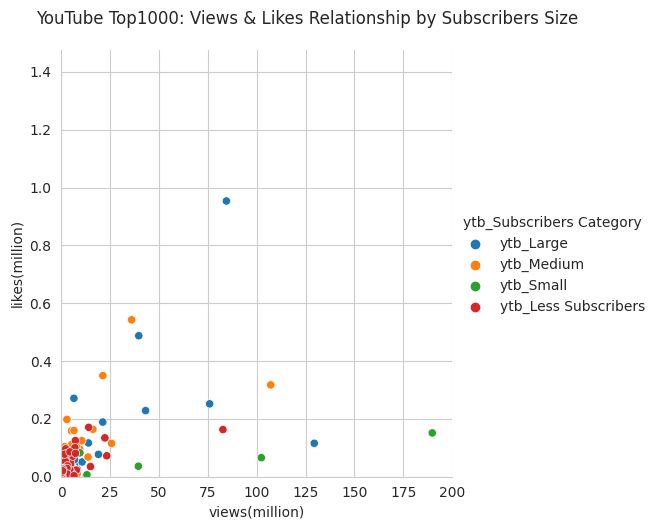

In [320]:
sns.relplot(data=ytb_engagement_top_1000, x='views(million)',y='likes(million)',hue='ytb_Subscribers Category',col_order=ytb_subscribers_order,kind='scatter').fig.suptitle('YouTube Top1000: Views & Likes Relationship by Subscribers Size',y=1.05)
plt.ylim(0)
plt.xlim(0,200)

(0.0, 150.0)

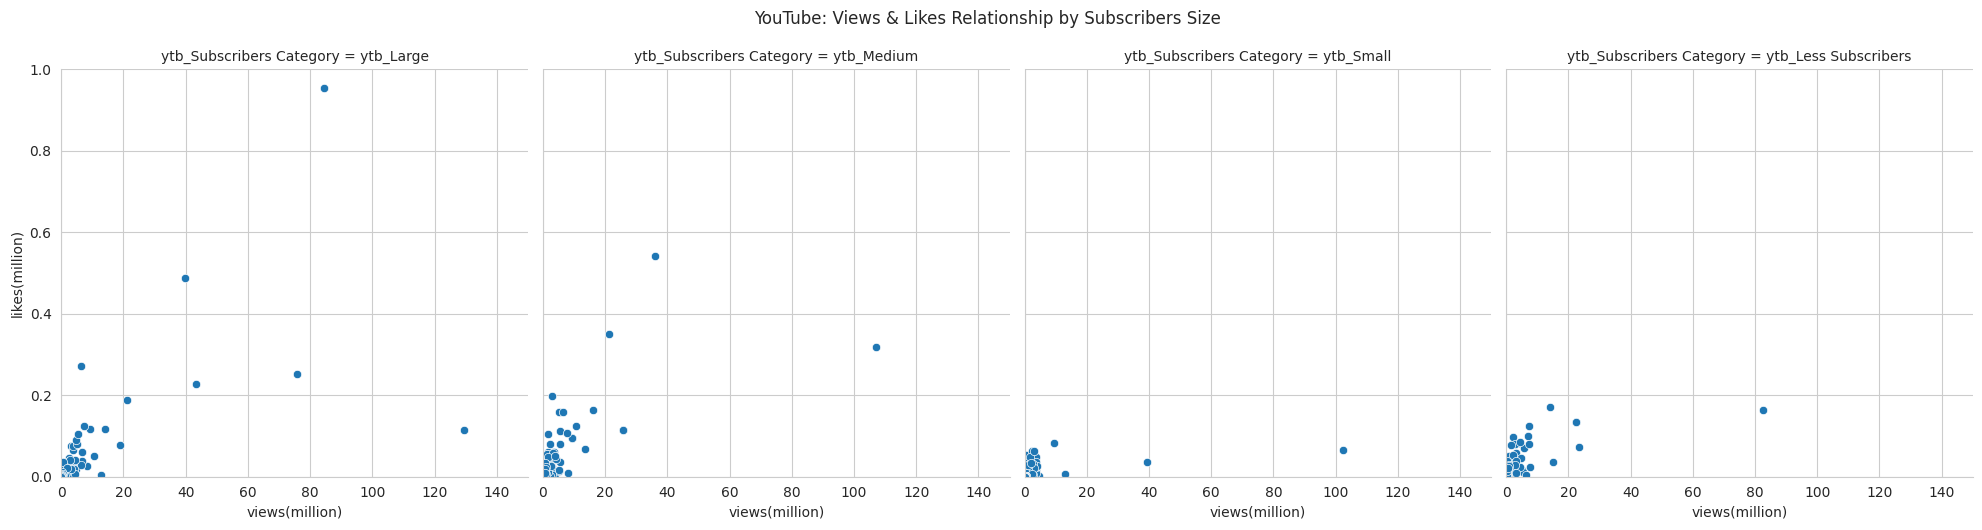

In [250]:
sns.relplot(data=ytb_engagement_top_1000, x='views(million)',y='likes(million)',col='ytb_Subscribers Category',col_order=ytb_subscribers_order,kind='scatter').fig.suptitle('YouTube: Views & Likes Relationship by Subscribers Size',y=1.05)
plt.ylim(0,1)
plt.xlim(0,150)

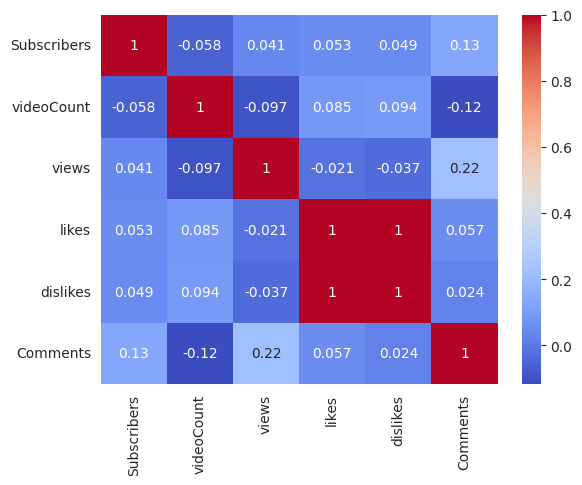

In [88]:
desired_corr_top1000 = ytb_engagement[['Subscribers','videoCount','views','likes','dislikes','Comments']].head(1000).corr()

sns.heatmap(desired_corr_top1000, annot=True, cmap='coolwarm')

plt.show()

In [89]:
ytb_engagement.head(500)

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,
484798,25253114,11445,55704,100730.0,1.808308,0.003989,178.0,0.000007,0.001767,36.0,1.425567e-06,0.000357,2,7.919815e-08,0.000020
493692,25252292,11445,55800,1500644.0,26.893262,0.059426,2262.0,0.000090,0.001507,524.0,2.075059e-05,0.000349,318,1.259292e-05,0.000212
196762,25251402,11445,51024,26177.0,0.513033,0.001037,84.0,0.000003,0.003209,14.0,5.544247e-07,0.000535,8,3.168141e-07,0.000306
246969,25250603,11445,55680,50888.0,0.913937,0.002015,90.0,0.000004,0.001769,12.0,4.752362e-07,0.000236,7,2.772211e-07,0.000138
172005,25250221,11445,39384,8221551.0,208.753580,0.325603,25558.0,0.001012,0.003109,1172.0,4.641544e-05,0.000143,841,3.330664e-05,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548783,9025109,1131,43488,102879.0,2.365687,0.011399,1595.0,0.000177,0.015504,37.0,4.099673e-06,0.000360,73,8.088545e-06,0.000710
548063,9025082,1131,43488,102879.0,2.365687,0.011399,1595.0,0.000177,0.015504,37.0,4.099686e-06,0.000360,73,8.088569e-06,0.000710
223801,9023799,1131,68352,13115.0,0.191874,0.001453,43.0,0.000005,0.003279,2.0,2.216361e-07,0.000152,15,1.662271e-06,0.001144


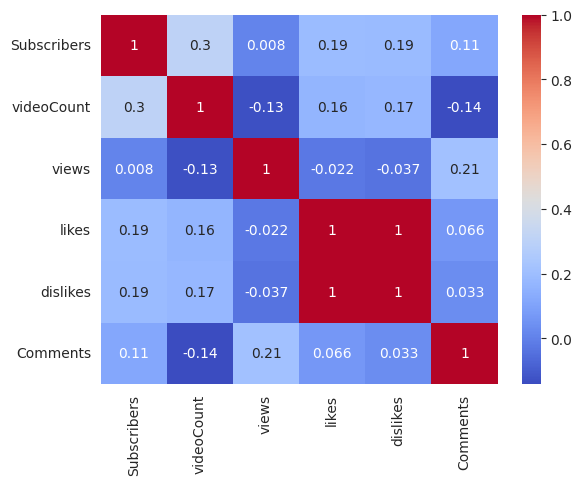

In [90]:
desired_corr_top500 = ytb_engagement[['Subscribers','videoCount','views','likes','dislikes','Comments']].head(500).corr()

sns.heatmap(desired_corr_top500, annot=True, cmap='coolwarm')

plt.show()

In [91]:
ytb_engagement_top100 = ytb_engagement.head(100)

ytb_engagement_top100

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
Channel_Num,,,,,,,,,,,,,,,
484798,25253114,11445,55704,100730.0,1.808308,0.003989,178.0,7.048636e-06,0.001767,36.0,1.425567e-06,0.000357,2,7.919815e-08,0.000020
493692,25252292,11445,55800,1500644.0,26.893262,0.059426,2262.0,8.957603e-05,0.001507,524.0,2.075059e-05,0.000349,318,1.259292e-05,0.000212
196762,25251402,11445,51024,26177.0,0.513033,0.001037,84.0,3.326548e-06,0.003209,14.0,5.544247e-07,0.000535,8,3.168141e-07,0.000306
246969,25250603,11445,55680,50888.0,0.913937,0.002015,90.0,3.564271e-06,0.001769,12.0,4.752362e-07,0.000236,7,2.772211e-07,0.000138
172005,25250221,11445,39384,8221551.0,208.753580,0.325603,25558.0,1.012189e-03,0.003109,1172.0,4.641544e-05,0.000143,841,3.330664e-05,0.000102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453861,18059195,31026,33912,72314.0,2.132402,0.004004,640.0,3.543901e-05,0.008850,135.0,7.475416e-06,0.001867,50,2.768673e-06,0.000691
196468,18058790,31023,28104,58655.0,2.087069,0.003248,459.0,2.541699e-05,0.007825,70.0,3.876229e-06,0.001193,57,3.156358e-06,0.000972
157715,18058726,31023,58248,7515.0,0.129017,0.000416,34.0,1.882746e-06,0.004524,3.0,1.661247e-07,0.000399,-1,-1.000000e+00,-1.000000


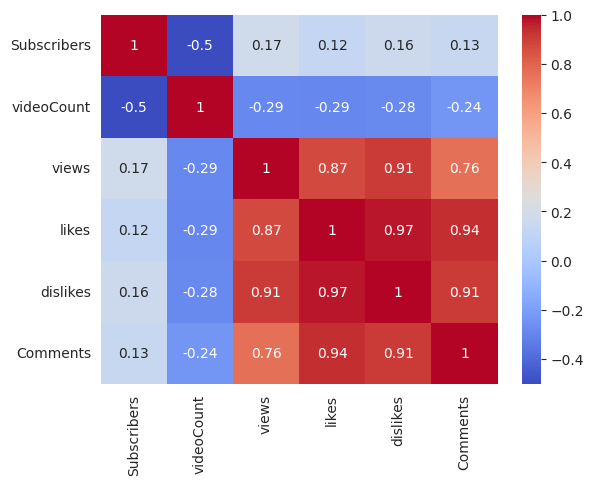

In [92]:
desired_corr_top100 = ytb_engagement[['Subscribers','videoCount','views','likes','dislikes','Comments']].head(100).corr()

sns.heatmap(desired_corr_top100, annot=True, cmap='coolwarm')

plt.show()

In [93]:
ytb_engagement_top100.describe()

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views
count,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000,100.000000,1.000000e+02,100.000000
mean,2.058818e+07,13534.000000,44634.720000,4.032545e+06,85.531977,0.185722,34107.280000,1.591907e-03,0.008730,1026.420000,4.732031e-05,0.000424,5121.110000,-2.097677e-01,-0.209214
std,2.491898e+06,10890.798478,15427.708185,1.280841e+07,253.914327,0.568090,115345.673753,5.175899e-03,0.007692,3417.632485,1.513578e-04,0.000553,24186.088671,4.094819e-01,0.409769
min,1.805868e+07,120.000000,20184.000000,1.289000e+03,0.023081,0.000054,2.000000,8.346959e-08,0.001184,0.000000,0.000000e+00,0.000000,-1.000000,-1.000000e+00,-1.000000
25%,1.806062e+07,7677.000000,30864.000000,3.557050e+04,0.826642,0.001570,158.250000,6.823026e-06,0.003722,12.000000,5.410287e-07,0.000138,1.000000,4.697489e-08,0.000054
50%,2.049981e+07,8173.000000,45372.000000,2.636825e+05,9.432515,0.014288,2686.000000,1.357373e-04,0.006301,67.000000,3.265442e-06,0.000232,130.500000,6.579728e-06,0.000285
75%,2.273330e+07,31023.000000,56370.000000,1.655360e+06,37.720850,0.088131,9021.250000,4.450419e-04,0.010683,505.250000,2.227810e-05,0.000464,599.250000,3.114704e-05,0.001125
max,2.525311e+07,31027.000000,80136.000000,8.449583e+07,1951.585227,3.716891,953651.000000,4.195020e-02,0.046408,28792.000000,1.266533e-03,0.003476,191498.000000,8.423814e-03,0.010129


In [94]:
small_ytb = (ytb_engagement_top100['Subscribers'] >= ytb_engagement_top100['Subscribers'].quantile(0.25)) & (ytb_engagement_top100['Subscribers'] <= ytb_engagement_top100['Subscribers'].median())

medium_ytb = (ytb_engagement_top100['Subscribers'] >= ytb_engagement_top100['Subscribers'].median()) & (ytb_engagement_top100['Subscribers'] <= ytb_engagement_top100['Subscribers'].quantile(0.75))

large_ytb = (ytb_engagement_top100['Subscribers'] >= ytb_engagement_top100['Subscribers'].quantile(0.75)) & (ytb_engagement_top100['Subscribers'] <= ytb_engagement_top100['Subscribers'].max())

ytb_engagement_conditions = [small_ytb, medium_ytb, large_ytb]

ytb_engagement_top100_categories = ['small_ytb_subscribers','medium_ytb_subscribers','large_ytb_subscribers']

ytb_engagement_top100['subscribers category'] = np.select(ytb_engagement_conditions,
                              ytb_engagement_top100_categories,
                              default='Less_ytb_subscribers')

<ipython-input-94-7a3afe79f89d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytb_engagement_top100['subscribers category'] = np.select(ytb_engagement_conditions,


In [95]:
ytb_engagement_top100

,Subscribers,videoCount,elapsedtime,views,views/elapsedtime,views/subscribers,likes,likes/subscriber,likes/views,dislikes,dislikes/subscriber,dislikes/views,Comments,comments/subscriber,comments/views,subscribers category
Channel_Num,,,,,,,,,,,,,,,,
484798,25253114,11445,55704,100730.0,1.808308,0.003989,178.0,7.048636e-06,0.001767,36.0,1.425567e-06,0.000357,2,7.919815e-08,0.000020,large_ytb_subscribers
493692,25252292,11445,55800,1500644.0,26.893262,0.059426,2262.0,8.957603e-05,0.001507,524.0,2.075059e-05,0.000349,318,1.259292e-05,0.000212,large_ytb_subscribers
196762,25251402,11445,51024,26177.0,0.513033,0.001037,84.0,3.326548e-06,0.003209,14.0,5.544247e-07,0.000535,8,3.168141e-07,0.000306,large_ytb_subscribers
246969,25250603,11445,55680,50888.0,0.913937,0.002015,90.0,3.564271e-06,0.001769,12.0,4.752362e-07,0.000236,7,2.772211e-07,0.000138,large_ytb_subscribers
172005,25250221,11445,39384,8221551.0,208.753580,0.325603,25558.0,1.012189e-03,0.003109,1172.0,4.641544e-05,0.000143,841,3.330664e-05,0.000102,large_ytb_subscribers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453861,18059195,31026,33912,72314.0,2.132402,0.004004,640.0,3.543901e-05,0.008850,135.0,7.475416e-06,0.001867,50,2.768673e-06,0.000691,Less_ytb_subscribers
196468,18058790,31023,28104,58655.0,2.087069,0.003248,459.0,2.541699e-05,0.007825,70.0,3.876229e-06,0.001193,57,3.156358e-06,0.000972,Less_ytb_subscribers
157715,18058726,31023,58248,7515.0,0.129017,0.000416,34.0,1.882746e-06,0.004524,3.0,1.661247e-07,0.000399,-1,-1.000000e+00,-1.000000,Less_ytb_subscribers


In [96]:
ytb_engagement_top100['views(thousand)'] = ytb_engagement_top100['views']/1000

ytb_engagement_top100['likes(thousand)'] = ytb_engagement_top100['likes']/1000

<ipython-input-96-2f2c263cb5cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytb_engagement_top100['views(thousand)'] = ytb_engagement_top100['views']/1000
<ipython-input-96-2f2c263cb5cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytb_engagement_top100['likes(thousand)'] = ytb_engagement_top100['likes']/1000


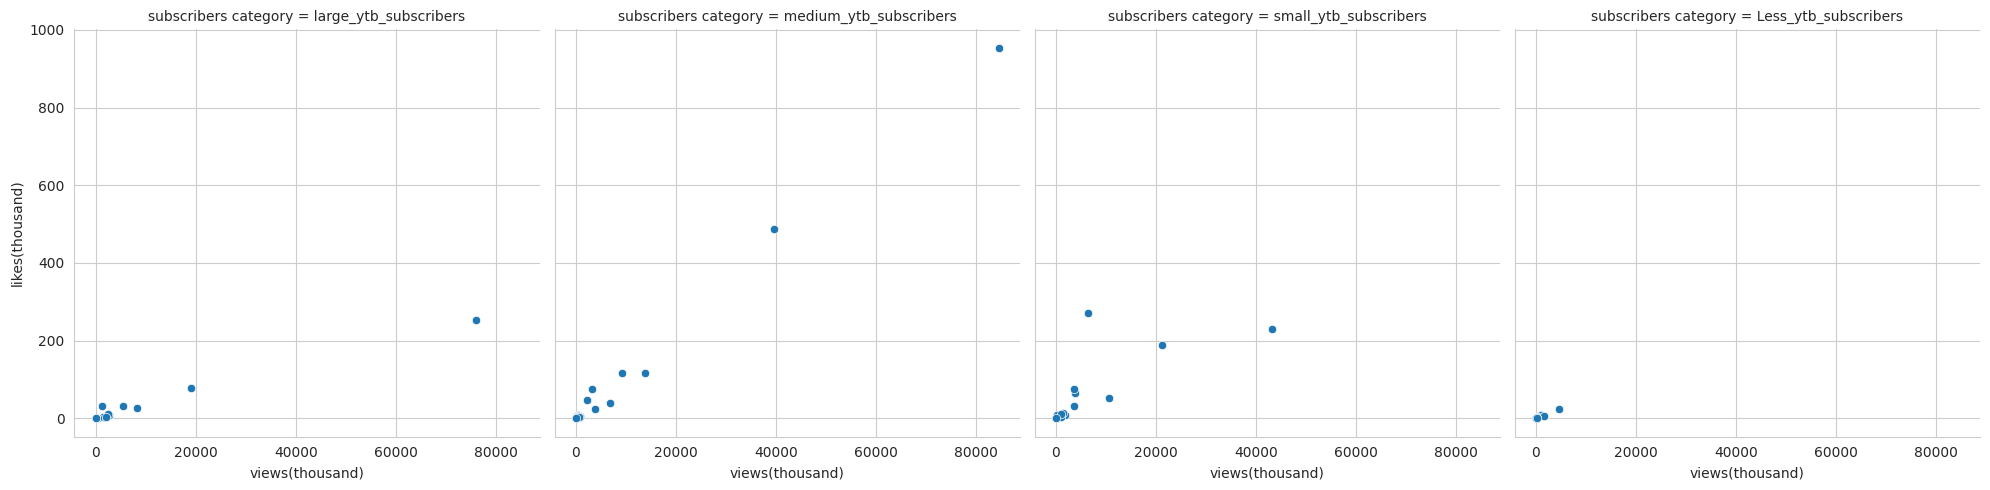

In [252]:
sns.relplot(data=ytb_engagement_top100, x='views(thousand)',y='likes(thousand)',col='subscribers category')

plt.show()

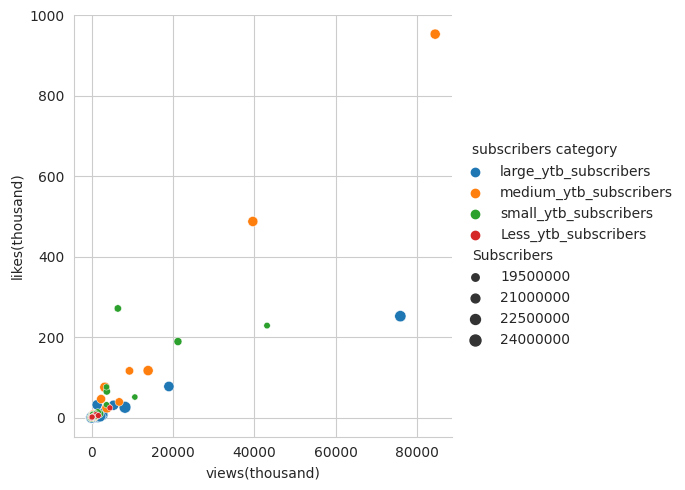

In [97]:
sns.relplot(data=ytb_engagement_top100, x='views(thousand)',y='likes(thousand)',hue='subscribers category',size='Subscribers')

plt.show()

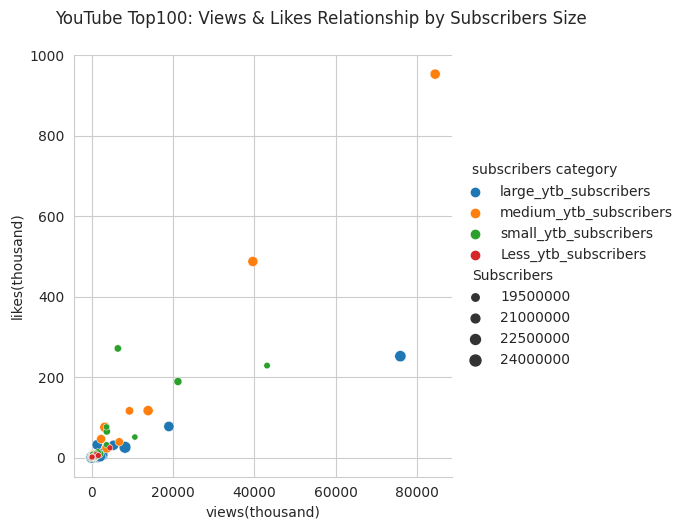

In [321]:
sns.relplot(data=ytb_engagement_top100, x='views(thousand)',y='likes(thousand)',hue='subscribers category',size='Subscribers',kind='scatter').fig.suptitle('YouTube Top100: Views & Likes Relationship by Subscribers Size',y=1.05)
# plt.ylim(0,300)
# plt.xlim(0,20000)
plt.show()

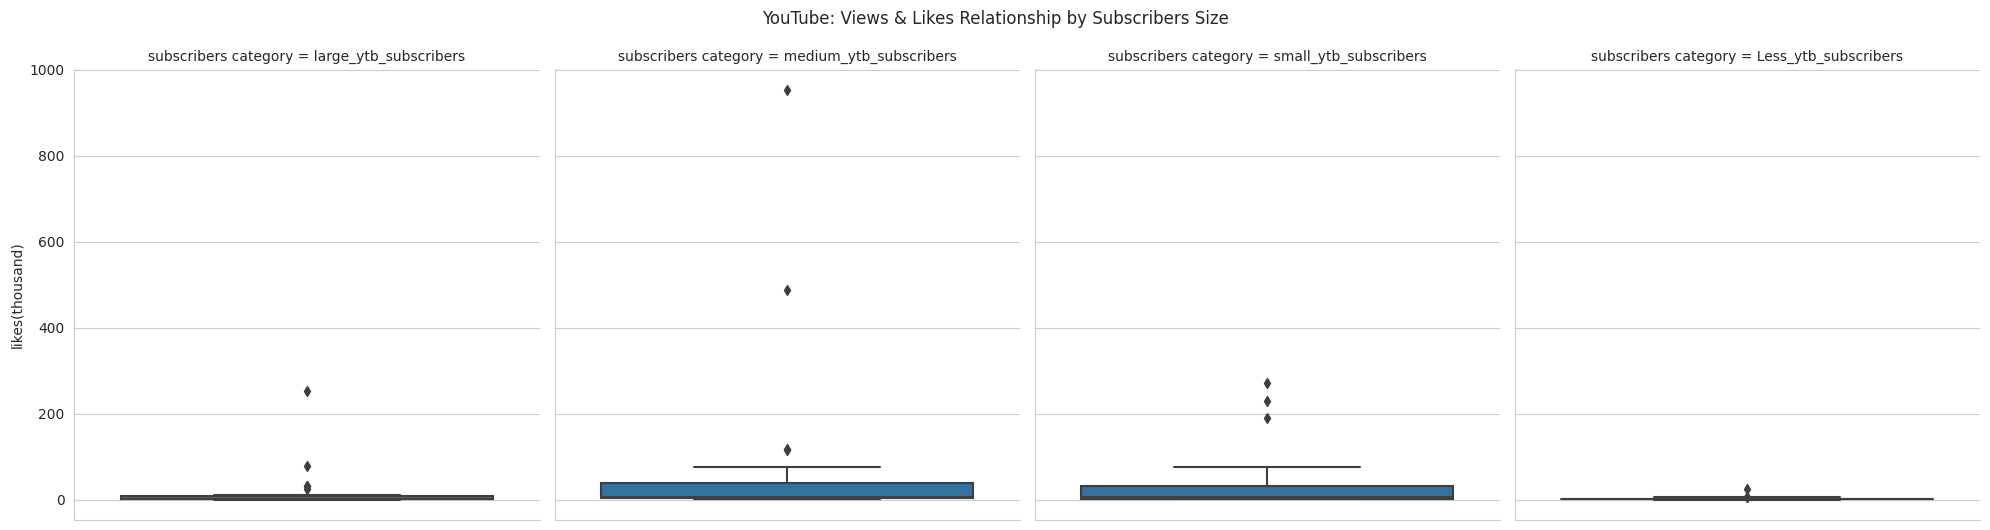

In [265]:
sns.catplot(data=ytb_engagement_top100, y='likes(thousand)',col='subscribers category',kind='box').fig.suptitle('YouTube: Views & Likes Relationship by Subscribers Size',y=1.05)

plt.show()

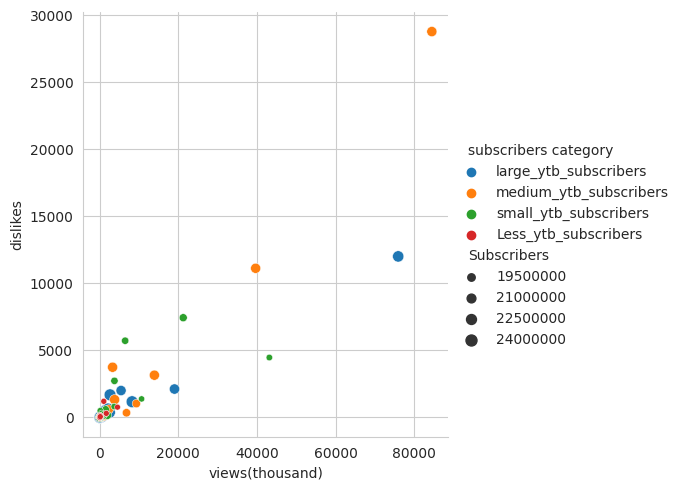

In [99]:
sns.relplot(data=ytb_engagement_top100, x='views(thousand)',y='dislikes',hue='subscribers category',size='Subscribers')

plt.show()

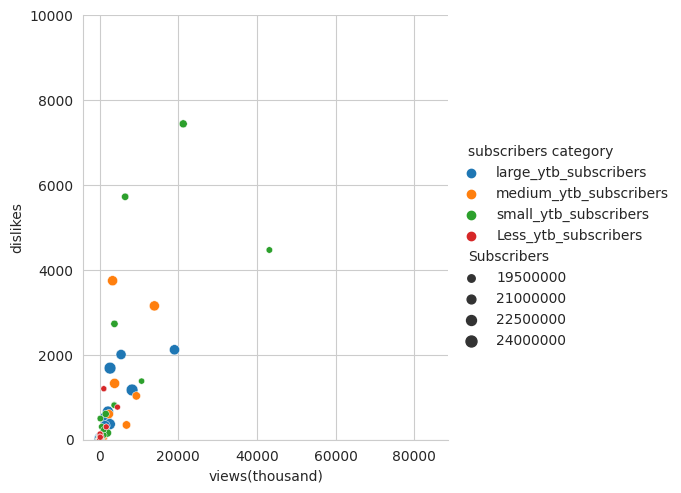

In [100]:
sns.relplot(data=ytb_engagement_top100, x='views(thousand)',y='dislikes',hue='subscribers category',size='Subscribers')
plt.ylim(0,10000)
plt.show()

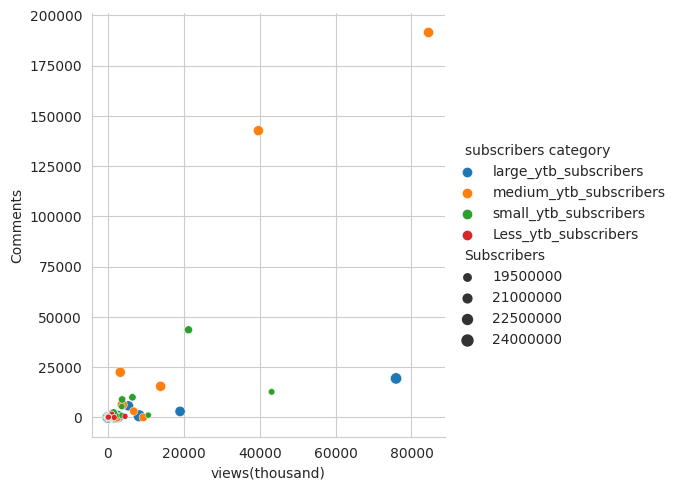

In [101]:
sns.relplot(data=ytb_engagement_top100, x='views(thousand)',y='Comments',hue='subscribers category',size='Subscribers')

plt.show()

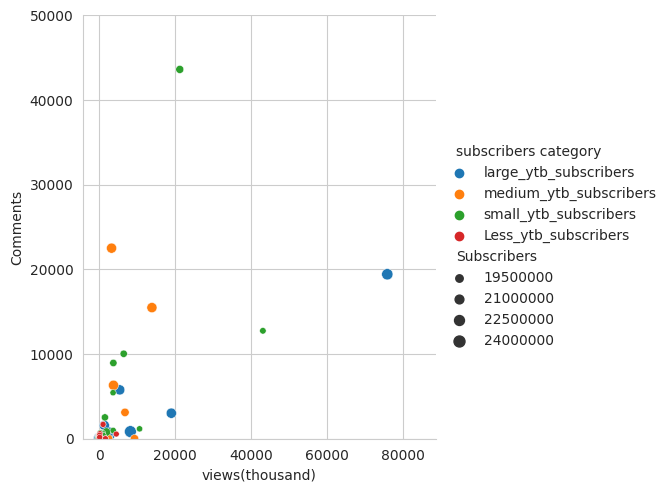

In [102]:
sns.relplot(data=ytb_engagement_top100, x='views(thousand)',y='Comments',hue='subscribers category',size='Subscribers')
plt.ylim(0,50000)
plt.show()

In [103]:
subscribers_ytb = ytb_engagement['Subscribers'].head(100)
views_ytb = ytb_engagement['views'].head(100)
likes_ytb = ytb_engagement['likes'].head(100)
dislikes_ytb = ytb_engagement['dislikes'].head(100)
comments_ytb = ytb_engagement['Comments'].head(100)

views_ytb = sm.add_constant(views_ytb)

model_likes_ytb = sm.OLS(likes_ytb, views_ytb).fit()

result_likes_ytb = model_likes_ytb.summary()

print(result_likes_ytb)

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     314.8
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.30e-32
Time:                        19:58:38   Log-Likelihood:                -1235.1
No. Observations:                 100   AIC:                             2474.
Df Residuals:                      98   BIC:                             2479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2394.5874   5924.735      0.404      0.6

In [104]:
model_subscribers_ytb = sm.OLS(subscribers_ytb, views_ytb).fit()

result_subscribers_ytb = model_subscribers_ytb.summary()

print(result_subscribers_ytb)

                            OLS Regression Results                            
Dep. Variable:            Subscribers   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.999
Date:                Tue, 28 Nov 2023   Prob (F-statistic):             0.0865
Time:                        19:58:41   Log-Likelihood:                -1612.7
No. Observations:                 100   AIC:                             3229.
Df Residuals:                      98   BIC:                             3235.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.045e+07   2.59e+05     79.040      0.0

In [105]:
model_dislikes_ytb = sm.OLS(dislikes_ytb, views_ytb).fit()

result_dislikes_ytb = model_dislikes_ytb.summary()

print(result_dislikes_ytb)

                            OLS Regression Results                            
Dep. Variable:               dislikes   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     473.2
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           2.70e-39
Time:                        19:58:45   Log-Likelihood:                -866.92
No. Observations:                 100   AIC:                             1738.
Df Residuals:                      98   BIC:                             1743.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         47.0658    149.231      0.315      0.7

In [106]:
model_comments_ytb = sm.OLS(comments_ytb, views_ytb).fit()

result_comments_ytb = model_comments_ytb.summary()

print(result_comments_ytb)

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     134.0
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           4.80e-20
Time:                        19:58:48   Log-Likelihood:                -1107.7
No. Observations:                 100   AIC:                             2219.
Df Residuals:                      98   BIC:                             2225.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -666.1047   1657.083     -0.402      0.6

In [107]:
ytb_top_1000 = pd.read_csv('Clean_Top_1000_Youtube_df - youtubers_df.csv')
ytb_top_1000

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Entertainment,"249,500,000",IN,"86,200","2,700",78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,Entertainment,"183,500,000",US,"117,400,000","5,300,000","18,500",http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Music,"165,500,000",US,"7,000,000","24,700",0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Entertainment,"162,600,000",IN,"15,600",166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,Hobby,"113,500,000",US,"3,900,000","12,400",0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Food,"11,700,000",KR,"397,400","14,000",124,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,Film,"11,700,000",IN,"1,100,000","92,500",164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Entertainment,"11,700,000",ID,"211,400",745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,Film,"11,700,000",IN,"14,000",81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [108]:
ytb_top_1000.dtypes

Rank           int64
Username      object
Categories    object
Suscribers    object
Country       object
Visits        object
Likes         object
Comments      object
Links         object
dtype: object

In [109]:
ytb_top_1000['Categories'].value_counts()

Entertainment              211
Lifestyle_(sociology)      201
Film                       108
Music                       94
Hobby                       42
Television_program          38
Society                     37
Video_game_culture          32
Pop_music                   28
Action_game                 26
Music_of_Asia               26
Action-adventure_game       22
Food                        21
Hip_hop_music               20
Technology                  12
Electronic_music            10
Role-playing_video_game     10
Knowledge                    8
Politics                     7
Music_of_Latin_America       6
Humour                       5
Rock_music                   4
News                         4
Performing_arts              3
Sport                        3
Strategy_video_game          3
Religion                     2
Physical_fitness             2
Pet                          2
Association_football         2
Health                       2
Vehicle                      2
Tourism 

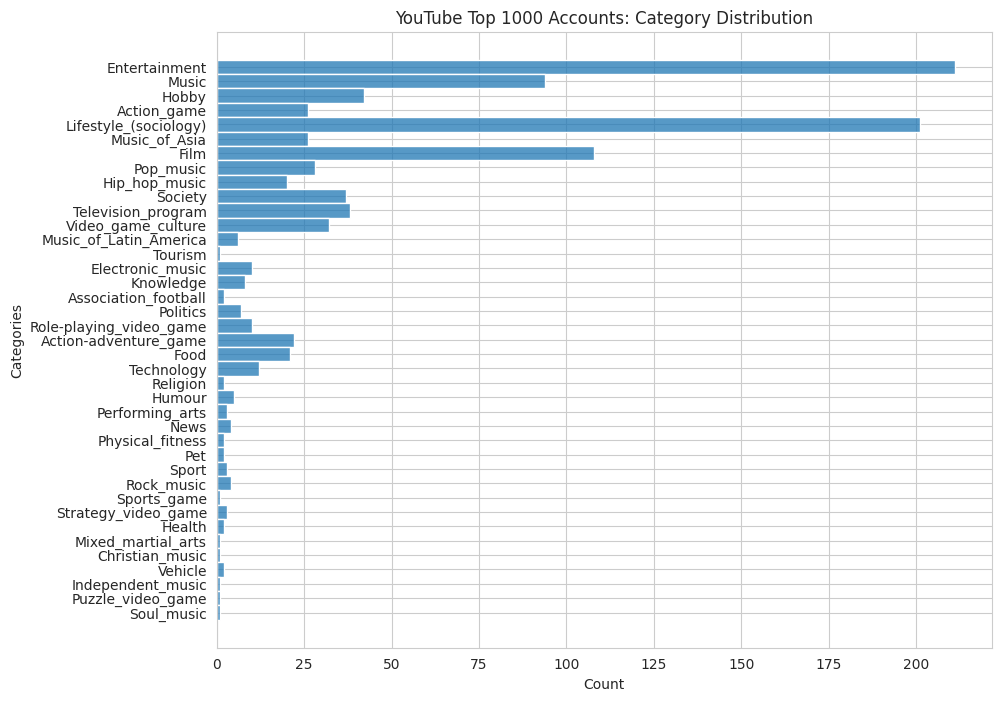

In [110]:
plt.figure(figsize=(10,8))

g = sns.histplot(data=ytb_top_1000, y='Categories')

g.set_title('YouTube Top 1000 Accounts: Category Distribution')

plt.show()

In [111]:
mau = pd.read_csv('Top 15 Social Media Active Users January 2023.csv')

mau

,Social Network,Active Users
0,Facebook,2958000000
1,YouTube,2514000000
2,WhatsApp,2000000000
3,Instagram,2000000000
4,WeChat,1309000000
5,TikTok,1051000000
6,Facebook Messenger,931000000
7,Douyin,715000000
8,Telegram,700000000
9,Snapchat,635000000


In [112]:
mau.dtypes

Social Network    object
Active Users       int64
dtype: object

In [113]:
mau = mau.sort_values('Active Users',ascending=False)

mau

,Social Network,Active Users
0,Facebook,2958000000
1,YouTube,2514000000
2,WhatsApp,2000000000
3,Instagram,2000000000
4,WeChat,1309000000
5,TikTok,1051000000
6,Facebook Messenger,931000000
7,Douyin,715000000
8,Telegram,700000000
9,Snapchat,635000000


In [114]:
mau_interested = mau[(mau['Social Network'] == 'Facebook') |
          (mau['Social Network'] == 'YouTube') |
          (mau['Social Network'] == 'Instagram') |
          (mau['Social Network'] == 'TikTok') |
          (mau['Social Network'] == 'Twitter')]

mau_interested

,Social Network,Active Users
0,Facebook,2958000000
1,YouTube,2514000000
3,Instagram,2000000000
5,TikTok,1051000000
13,Twitter,556000000


In [115]:
soc_demo = pd.read_excel('social_media_demo.xlsx')
soc_demo

,Unnamed: 0,Facebook,Instagram,Twitter,YouTube,Tiktok
0,Total,0.69,0.40,0.23,0.81,0.21
1,Men,0.61,0.36,0.25,0.82,0.17
2,Women,0.77,0.44,0.22,0.80,0.24
3,Ages 18-29,0.70,0.71,0.42,0.95,0.48
4,30-49,0.77,0.48,0.27,0.91,0.22
5,50-64,0.73,0.29,0.18,0.83,0.14
6,65+,0.50,0.13,0.07,0.49,0.04
7,less than $30k,0.70,0.35,0.12,0.75,0.22
8,"30$- 49,99$",0.76,0.45,0.29,0.83,0.29
9,"50$-74,99$",0.61,0.39,0.22,0.79,0.20


In [116]:
soc_demo = soc_demo.rename(columns={'Unnamed: 0': 'Demographics KPIs'})

In [117]:
soc_demo

,Demographics KPIs,Facebook,Instagram,Twitter,YouTube,Tiktok
0,Total,0.69,0.40,0.23,0.81,0.21
1,Men,0.61,0.36,0.25,0.82,0.17
2,Women,0.77,0.44,0.22,0.80,0.24
3,Ages 18-29,0.70,0.71,0.42,0.95,0.48
4,30-49,0.77,0.48,0.27,0.91,0.22
5,50-64,0.73,0.29,0.18,0.83,0.14
6,65+,0.50,0.13,0.07,0.49,0.04
7,less than $30k,0.70,0.35,0.12,0.75,0.22
8,"30$- 49,99$",0.76,0.45,0.29,0.83,0.29
9,"50$-74,99$",0.61,0.39,0.22,0.79,0.20


In [118]:
soc_demo_age = soc_demo.iloc[3:7]
soc_demo_age

,Demographics KPIs,Facebook,Instagram,Twitter,YouTube,Tiktok
3,Ages 18-29,0.70,0.71,0.42,0.95,0.48
4,30-49,0.77,0.48,0.27,0.91,0.22
5,50-64,0.73,0.29,0.18,0.83,0.14
6,65+,0.50,0.13,0.07,0.49,0.04


In [119]:
soc_demo_gender = soc_demo.iloc[1:3]
soc_demo_gender

,Demographics KPIs,Facebook,Instagram,Twitter,YouTube,Tiktok
1,Men,0.61,0.36,0.25,0.82,0.17
2,Women,0.77,0.44,0.22,0.80,0.24


In [120]:
soc_demo_income = soc_demo.iloc[7:11]
soc_demo_income

,Demographics KPIs,Facebook,Instagram,Twitter,YouTube,Tiktok
7,less than $30k,0.70,0.35,0.12,0.75,0.22
8,"30$- 49,99$",0.76,0.45,0.29,0.83,0.29
9,"50$-74,99$",0.61,0.39,0.22,0.79,0.20
10,75$ +,0.70,0.47,0.34,0.90,0.20


In [121]:
soc_demo_edu = soc_demo.iloc[11:]
soc_demo_edu

,Demographics KPIs,Facebook,Instagram,Twitter,YouTube,Tiktok
11,highschool or less,0.64,0.30,0.14,0.70,0.21
12,some college,0.71,0.44,0.26,0.86,0.24
13,College Graduate,0.73,0.49,0.33,0.89,0.19
14,Urban,0.70,0.45,0.27,0.84,0.24
15,Suburban,0.70,0.41,0.23,0.81,0.20
16,Rural,0.67,0.25,0.18,0.74,0.16


In [298]:
ins_user = pd.read_csv('Instagram User.csv')

ins_user

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate
0,1,instagram,brand,photography,7.3K,580.1M,7.31K,0.1%
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519.9M,3.41K,1.4%
2,3,leomessi,male,"Health, Sports & Fitness",1K,403.7M,0.97K,1.7%
3,4,kyliejenner,female,entertainment,7K,375.9M,7.02K,1.7%
4,5,selenagomez,female,entertainment,1.8K,365.3M,1.85K,1.1%
...,...,...,...,...,...,...,...,...
195,196,fcbayern,male,"Health, Sports & Fitness",16.8K,35.4M,16.78K,0.6%
196,197,colesprouse,male,entertainment,1.1K,35.3M,1.14K,3.5%
197,198,shaymitchell,male,entertainment,6.3K,35.1M,6.31K,1.2%
198,199,ivetesangalo,female,entertainment,7.8K,35M,7.77K,0.4%


In [299]:
ins_user['Category'].value_counts()

entertainment               129
Health, Sports & Fitness     39
fashion                      10
News & Politics               3
Beauty & Makeup               3
photography                   2
technology                    2
food                          2
Lifestyle                     1
Finance                       1
Craft/DIY                     1
Name: Category, dtype: int64

In [300]:
ins_user.dtypes

rank             int64
name            object
channel_Info    object
Category        object
Posts           object
Followers       object
Avg. Likes      object
Eng Rate        object
dtype: object

In [301]:
ins_user['Adj Posts'] = ins_user['Posts'].str.replace('K','')

In [302]:
ins_user['Adj Followers'] = ins_user['Followers'].str.replace('M','')

In [303]:
ins_user['Adj Avg Likes'] = ins_user['Avg. Likes'].str.replace('K','')

In [304]:
ins_user = ins_user.drop(columns=['Posts','Followers','Avg. Likes','Eng Rate'])

In [305]:
ins_user

,rank,name,channel_Info,Category,Adj Posts,Adj Followers,Adj Avg Likes
0,1,instagram,brand,photography,7.3,580.1,7.31
1,2,cristiano,male,"Health, Sports & Fitness",3.4,519.9,3.41
2,3,leomessi,male,"Health, Sports & Fitness",1,403.7,0.97
3,4,kyliejenner,female,entertainment,7,375.9,7.02
4,5,selenagomez,female,entertainment,1.8,365.3,1.85
...,...,...,...,...,...,...,...
195,196,fcbayern,male,"Health, Sports & Fitness",16.8,35.4,16.78
196,197,colesprouse,male,entertainment,1.1,35.3,1.14
197,198,shaymitchell,male,entertainment,6.3,35.1,6.31
198,199,ivetesangalo,female,entertainment,7.8,35,7.77


In [306]:
ins_user[['Adj Posts','Adj Followers','Adj Avg Likes']] = ins_user[['Adj Posts','Adj Followers','Adj Avg Likes']].astype(float)

In [307]:
ins_user.dtypes

rank               int64
name              object
channel_Info      object
Category          object
Adj Posts        float64
Adj Followers    float64
Adj Avg Likes    float64
dtype: object

In [308]:
ins_user['Adj Posts'] = ins_user['Adj Posts'] * 1000

ins_user['Adj Followers'] = ins_user['Adj Followers'] * 1000000

ins_user['Adj Avg Likes'] = ins_user['Adj Avg Likes'] * 10000

In [309]:
ins_small = (ins_user['Adj Followers'] >= ins_user['Adj Followers'].quantile(0.25)) & (ins_user['Adj Followers'] <= ins_user['Adj Followers'].median())

ins_medium = (ins_user['Adj Followers'] >= ins_user['Adj Followers'].median()) & (ins_user['Adj Followers'] <= ins_user['Adj Followers'].quantile(0.75))

ins_large = ins_user['Adj Followers'] >= ins_user['Adj Followers'].quantile(0.75)

ins_conditions = [ins_small, ins_medium, ins_large]

ins_subscriber_category = ['ins_small', 'ins_medium', 'ins_large']

ins_user['ins_Subscribers Category'] = np.select(ins_conditions, ins_subscriber_category, default='ins_Less Subscribers')

ins_user

,rank,name,channel_Info,Category,Adj Posts,Adj Followers,Adj Avg Likes,ins_Subscribers Category
0,1,instagram,brand,photography,7300.0,580100000.0,73100.0,ins_large
1,2,cristiano,male,"Health, Sports & Fitness",3400.0,519900000.0,34100.0,ins_large
2,3,leomessi,male,"Health, Sports & Fitness",1000.0,403700000.0,9700.0,ins_large
3,4,kyliejenner,female,entertainment,7000.0,375900000.0,70200.0,ins_large
4,5,selenagomez,female,entertainment,1800.0,365300000.0,18500.0,ins_large
...,...,...,...,...,...,...,...,...
195,196,fcbayern,male,"Health, Sports & Fitness",16800.0,35400000.0,167800.0,ins_Less Subscribers
196,197,colesprouse,male,entertainment,1100.0,35300000.0,11400.0,ins_Less Subscribers
197,198,shaymitchell,male,entertainment,6300.0,35100000.0,63100.0,ins_Less Subscribers
198,199,ivetesangalo,female,entertainment,7800.0,35000000.0,77700.0,ins_Less Subscribers


Text(0.5, 1.05, 'Instagram Top200: Posts & Likes Relationship by Category')

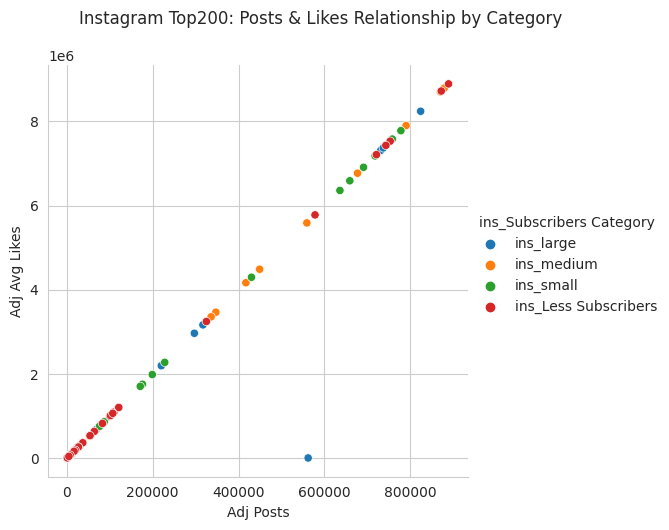

In [322]:
sns.relplot(data=ins_user, x='Adj Posts',y='Adj Avg Likes',hue='ins_Subscribers Category',kind='scatter').fig.suptitle('Instagram Top200: Posts & Likes Relationship by Category',y=1.05)

Text(0.5, 1.05, 'Instagram Top200: Posts & Likes Relationship by Category')

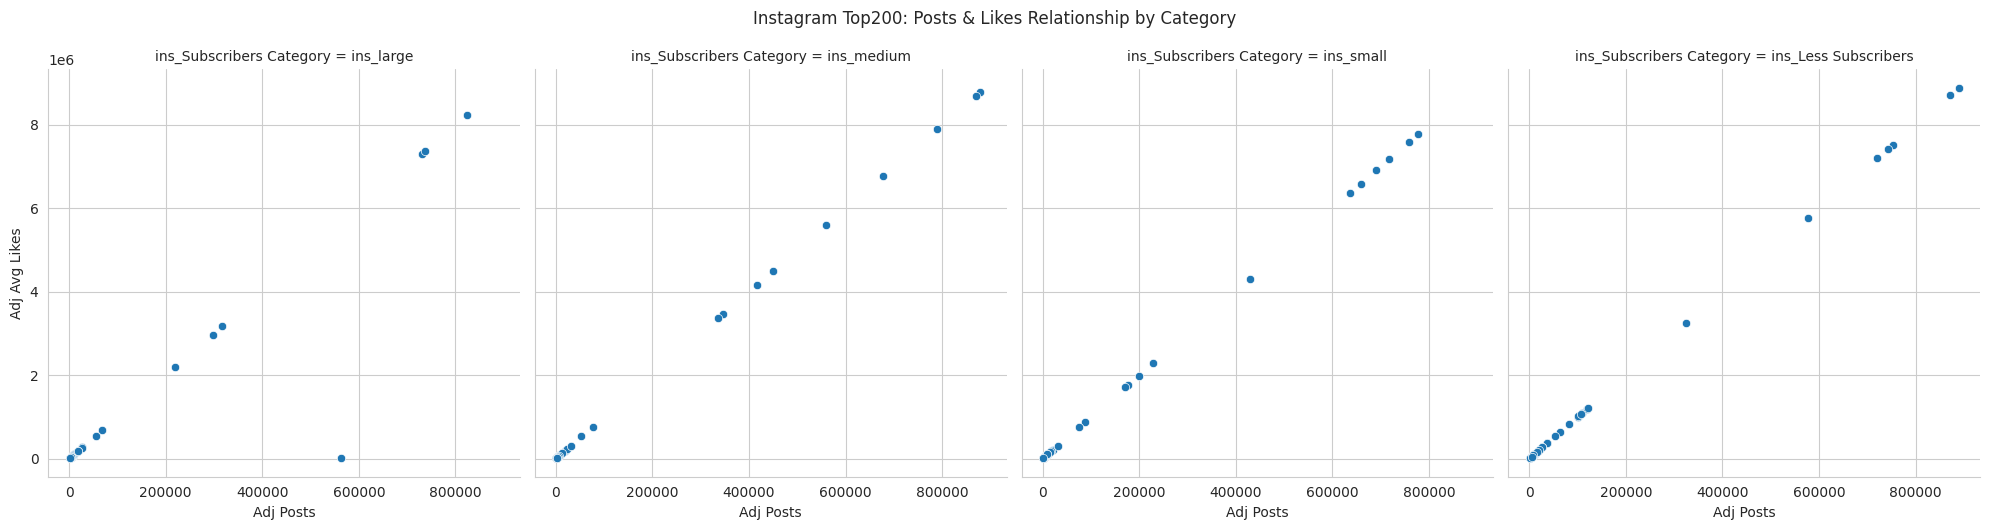

In [323]:
sns.relplot(data=ins_user, x='Adj Posts',y='Adj Avg Likes',col='ins_Subscribers Category',kind='scatter').fig.suptitle('Instagram Top200: Posts & Likes Relationship by Category',y=1.05)

Text(0.5, 1.0, 'Instagram Top200: Content Likes by Subscriber Size')

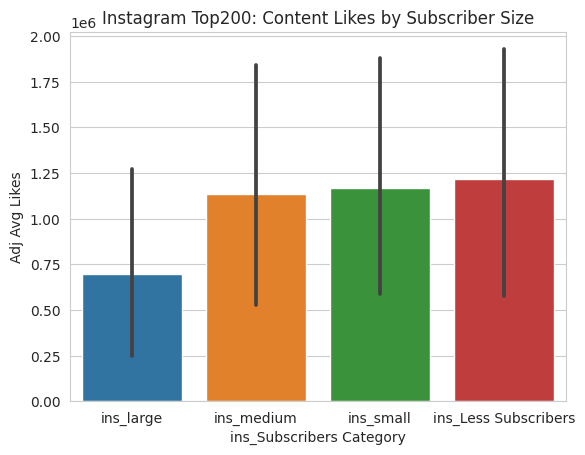

In [336]:
sns.barplot(data=ins_user, x='ins_Subscribers Category',y='Adj Avg Likes')
plt.title('Instagram Top200: Content Likes by Subscriber Size')

In [310]:
ins_user = ins_user.set_index('rank')

ins_user

,name,channel_Info,Category,Adj Posts,Adj Followers,Adj Avg Likes,ins_Subscribers Category
rank,,,,,,,
1,instagram,brand,photography,7300.0,580100000.0,73100.0,ins_large
2,cristiano,male,"Health, Sports & Fitness",3400.0,519900000.0,34100.0,ins_large
3,leomessi,male,"Health, Sports & Fitness",1000.0,403700000.0,9700.0,ins_large
4,kyliejenner,female,entertainment,7000.0,375900000.0,70200.0,ins_large
5,selenagomez,female,entertainment,1800.0,365300000.0,18500.0,ins_large
...,...,...,...,...,...,...,...
196,fcbayern,male,"Health, Sports & Fitness",16800.0,35400000.0,167800.0,ins_Less Subscribers
197,colesprouse,male,entertainment,1100.0,35300000.0,11400.0,ins_Less Subscribers
198,shaymitchell,male,entertainment,6300.0,35100000.0,63100.0,ins_Less Subscribers


<ipython-input-311-96b541e5998e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ins_user_corr = ins_user.corr()


<Axes: >

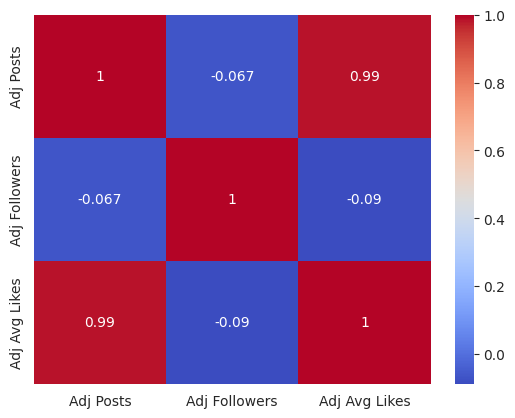

In [311]:
ins_user_corr = ins_user.corr()

sns.heatmap(data=ins_user_corr, annot=True, cmap='coolwarm')

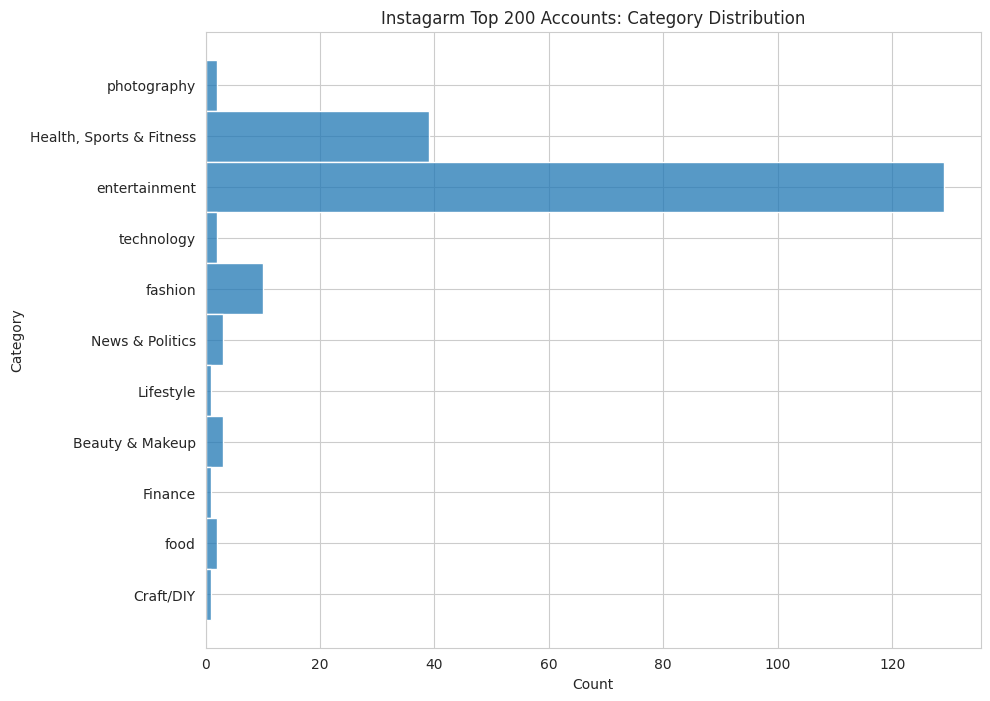

In [312]:
plt.figure(figsize=(10,8))

g = sns.histplot(data=ins_user, y='Category')

g.set_title('Instagarm Top 200 Accounts: Category Distribution')

plt.show()

In [313]:
ins_follower = ins_user['Adj Followers']
ins_posts = ins_user['Adj Posts']
ins_likes = ins_user['Adj Avg Likes']

ins_posts = sm.add_constant(ins_posts)

model_likes_ins = sm.OLS(ins_likes, ins_posts).fit()

result_likes_ins = model_likes_ins.summary()

print(result_likes_ins)

                            OLS Regression Results                            
Dep. Variable:          Adj Avg Likes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     6521.
Date:                Tue, 28 Nov 2023   Prob (F-statistic):          1.67e-153
Time:                        21:13:20   Log-Likelihood:                -2859.5
No. Observations:                 200   AIC:                             5723.
Df Residuals:                     198   BIC:                             5730.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2124.7270   3.08e+04     -0.069      0.9

In [314]:
ins_posts = sm.add_constant(ins_posts)

model_followers_ins = sm.OLS(ins_follower, ins_posts).fit()

result_followers_ins = model_followers_ins.summary()

print(result_followers_ins)

                            OLS Regression Results                            
Dep. Variable:          Adj Followers   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9021
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.343
Time:                        21:13:21   Log-Likelihood:                -3937.1
No. Observations:                 200   AIC:                             7878.
Df Residuals:                     198   BIC:                             7885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.819e+07   6.73e+06     13.106      0.0

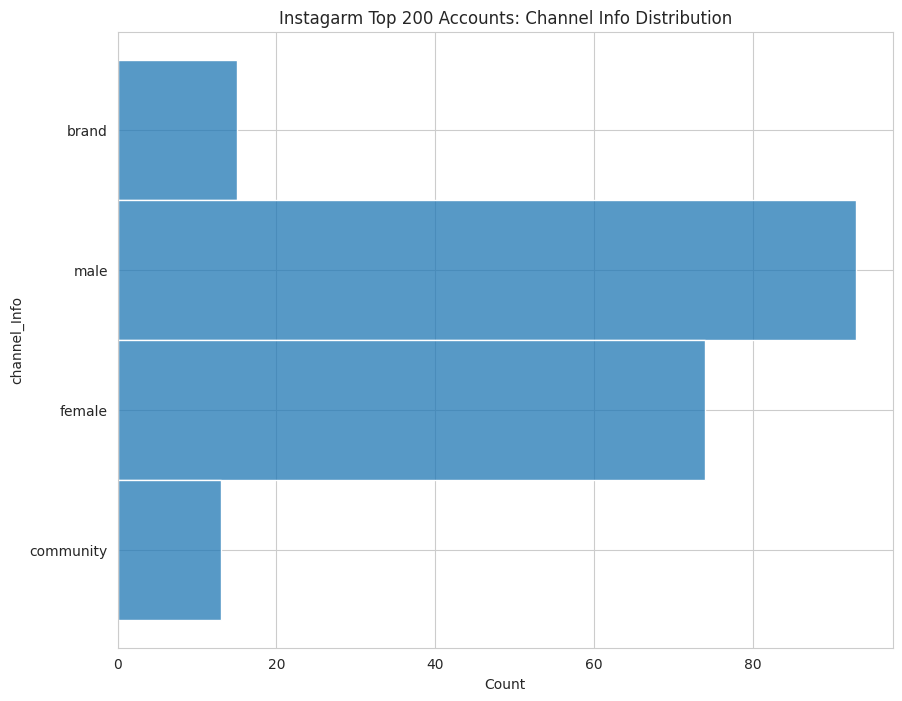

In [315]:
plt.figure(figsize=(10,8))

g = sns.histplot(data=ins_user, y='channel_Info')

g.set_title('Instagarm Top 200 Accounts: Channel Info Distribution')

plt.show()

In [140]:
ytb_top_1000

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Entertainment,"249,500,000",IN,"86,200","2,700",78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,Entertainment,"183,500,000",US,"117,400,000","5,300,000","18,500",http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Music,"165,500,000",US,"7,000,000","24,700",0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Entertainment,"162,600,000",IN,"15,600",166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,Hobby,"113,500,000",US,"3,900,000","12,400",0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Food,"11,700,000",KR,"397,400","14,000",124,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,Film,"11,700,000",IN,"1,100,000","92,500",164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Entertainment,"11,700,000",ID,"211,400",745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,Film,"11,700,000",IN,"14,000",81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [141]:
ytb_top_1000['Categories'].value_counts()

Entertainment              211
Lifestyle_(sociology)      201
Film                       108
Music                       94
Hobby                       42
Television_program          38
Society                     37
Video_game_culture          32
Pop_music                   28
Action_game                 26
Music_of_Asia               26
Action-adventure_game       22
Food                        21
Hip_hop_music               20
Technology                  12
Electronic_music            10
Role-playing_video_game     10
Knowledge                    8
Politics                     7
Music_of_Latin_America       6
Humour                       5
Rock_music                   4
News                         4
Performing_arts              3
Sport                        3
Strategy_video_game          3
Religion                     2
Physical_fitness             2
Pet                          2
Association_football         2
Health                       2
Vehicle                      2
Tourism 

In [142]:
ytb_top_1000.dtypes

Rank           int64
Username      object
Categories    object
Suscribers    object
Country       object
Visits        object
Likes         object
Comments      object
Links         object
dtype: object

In [143]:
ytb_top_1000['Visits'] = ytb_top_1000['Visits'].str.replace(',','')

In [144]:
ytb_top_1000['Likes'] = ytb_top_1000['Likes'].str.replace(',','')

In [145]:
ytb_top_1000['Comments'] = ytb_top_1000['Comments'].str.replace(',','')

In [146]:
ytb_top_1000[['Visits','Likes','Comments']] = ytb_top_1000[['Visits','Likes','Comments']].astype(float)

In [147]:
ytb_top_1000.dtypes

Rank            int64
Username       object
Categories     object
Suscribers     object
Country        object
Visits        float64
Likes         float64
Comments      float64
Links          object
dtype: object

In [148]:
ytb_film_tv = ytb_top_1000[(ytb_top_1000['Categories'] == 'Film') |
              (ytb_top_1000['Categories'] == 'Television_program')]['Likes']

ytb_life = ytb_top_1000[(ytb_top_1000['Categories'] == 'Hobby') |
            (ytb_top_1000['Categories'] == 'Food') |
            (ytb_top_1000['Categories'] == 'Humour') |
            (ytb_top_1000['Categories'] == 'Lifestyle_(sociology)') |
            (ytb_top_1000['Categories'] == 'Society') |
            (ytb_top_1000['Categories'] == 'Pet') |
            (ytb_top_1000['Categories'] == 'Sport')]['Likes']

ytb_games = ytb_top_1000[(ytb_top_1000['Categories'] == 'Video_game_culture') |
              (ytb_top_1000['Categories'] == 'Action_game') |
              (ytb_top_1000['Categories'] == 'Action-adventure_game') |
              (ytb_top_1000['Categories'] == 'Role-playing_video_game') |
              (ytb_top_1000['Categories'] == 'Strategy_video_game') |
              (ytb_top_1000['Categories'] == 'Sports_game') |
              (ytb_top_1000['Categories'] == 'Puzzle_video_game')]['Likes']

ytb_music = ytb_top_1000[(ytb_top_1000['Categories'] == 'Music') |
              (ytb_top_1000['Categories'] == 'Pop_music') |
              (ytb_top_1000['Categories'] == 'Music_of_Asia') |
              (ytb_top_1000['Categories'] == 'Hip_hop_music') |
              (ytb_top_1000['Categories'] == 'Electronic_music') |
              (ytb_top_1000['Categories'] == 'Music_of_Latin_America') |
              (ytb_top_1000['Categories'] == 'Rock_music') |
              (ytb_top_1000['Categories'] == 'Christian_music') |
              (ytb_top_1000['Categories'] == 'Indenpendent_music') |
              (ytb_top_1000['Categories'] == 'Soul_music')]['Likes']


In [149]:
f_stat, p_value_anova = f_oneway(ytb_film_tv, ytb_life, ytb_games, ytb_music)
print(f"ANOVA: f_stat={f_stat:.2f}, p_value={p_value_anova:.4f}")

ANOVA: f_stat=14.07, p_value=0.0000


In [150]:
alpha = 0.05
# Prepare the data for Tukey's HSD test
df_concat = pd.concat([ytb_film_tv, ytb_life, ytb_games, ytb_music])
labels = ['ytb_film_tv'] * len(ytb_film_tv) + ['ytb_life'] * len(ytb_life) + ['ytb_games'] * len(ytb_games) + ['ytb_music'] * len(ytb_music)

# Perform Tukey's HSD Test
print("\nTukey's HSD Test:")
tukey = pairwise_tukeyhsd(endog=df_concat, groups=labels, alpha=alpha)
print(tukey)


Tukey's HSD Test:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1     group2    meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------
ytb_film_tv ytb_games  81268.0729    0.0   43261.5953 119274.5504   True
ytb_film_tv  ytb_life  32224.4572  0.022    3298.4288  61150.4856   True
ytb_film_tv ytb_music   -355.7745    1.0  -32088.2344  31376.6855  False
  ytb_games  ytb_life -49043.6157 0.0012  -82842.9658 -15244.2656   True
  ytb_games ytb_music -81623.8474    0.0 -117854.0829 -45393.6119   True
   ytb_life ytb_music -32580.2317 0.0089  -59129.2947  -6031.1687   True
------------------------------------------------------------------------


In [151]:
ins_user

,name,channel_Info,Category,Adj Posts,Adj Followers,Adj Avg Likes
rank,,,,,,
1,instagram,brand,photography,7300.0,580100000.0,73100.0
2,cristiano,male,"Health, Sports & Fitness",3400.0,519900000.0,34100.0
3,leomessi,male,"Health, Sports & Fitness",1000.0,403700000.0,9700.0
4,kyliejenner,female,entertainment,7000.0,375900000.0,70200.0
5,selenagomez,female,entertainment,1800.0,365300000.0,18500.0
...,...,...,...,...,...,...
196,fcbayern,male,"Health, Sports & Fitness",16800.0,35400000.0,167800.0
197,colesprouse,male,entertainment,1100.0,35300000.0,11400.0
198,shaymitchell,male,entertainment,6300.0,35100000.0,63100.0


In [152]:
ins_user['Category'].value_counts()

entertainment               129
Health, Sports & Fitness     39
fashion                      10
News & Politics               3
Beauty & Makeup               3
photography                   2
technology                    2
food                          2
Lifestyle                     1
Finance                       1
Craft/DIY                     1
Name: Category, dtype: int64

In [153]:
entertainment = ins_user[ins_user['Category'] == 'entertainment']['Adj Avg Likes']
Health = ins_user[ins_user['Category'] == 'Health, Sports & Fitness']['Adj Avg Likes']
fashion = ins_user[(ins_user['Category'] == 'fashion') | (ins_user['Category'] == 'Beauty & Makeup')]['Adj Avg Likes']


In [154]:
entertainment.mean()

1075180.6201550388

In [155]:
Health.mean()

568461.5384615385

In [156]:
fashion.mean()

779361.5384615385

In [157]:
f_stat, p_value_anova = f_oneway(entertainment, Health, fashion)
print(f"ANOVA: f_stat={f_stat:.2f}, p_value={p_value_anova:.4f}")

ANOVA: f_stat=0.86, p_value=0.4251


In [158]:
alpha = 0.05
# Prepare the data for Tukey's HSD test
df_concat = pd.concat([entertainment, Health, fashion])
labels = ['entertainment'] * len(entertainment) + ['Health'] * len(Health) + ['fashion'] * len(fashion)

# Perform Tukey's HSD Test
print("\nTukey's HSD Test:")
tukey = pairwise_tukeyhsd(endog=df_concat, groups=labels, alpha=alpha)
print(tukey)


Tukey's HSD Test:
               Multiple Comparison of Means - Tukey HSD, FWER=0.05               
    group1        group2      meandiff   p-adj      lower        upper     reject
---------------------------------------------------------------------------------
       Health entertainment  506719.0817 0.4085  -429149.5574 1442587.7208  False
       Health       fashion     210900.0 0.9504 -1429255.8008 1851055.8008  False
entertainment       fashion -295819.0817 0.8858 -1786089.4045 1194451.2411  False
---------------------------------------------------------------------------------


In [159]:
twitter_top_1000 = pd.read_csv('Top-1000-Celebrity-Twitter-Accounts.csv')

twitter_top_1000

,twitter_username,twitter_userid,domain,name,followers_count,tweet_count
0,BarackObama,813286.0,obamabook.com,BarackObama,13444655.0,16467.0
1,justinbieber,27260086.0,smarturl.it,Justin Bieber,114357427.0,31399.0
2,katyperry,21447363.0,katyperry.com,KATY PERRY,108900656.0,11625.0
3,rihanna,79293791.0,rihannanow.com,Rihanna,106201663.0,10630.0
4,Cristiano,155659213.0,NaN,Cristiano Ronaldo,99274403.0,3780.0
...,...,...,...,...,...,...
982,MsLaurenLondon,NaN,NaN,Lauren London,NaN,NaN
983,wandaicardi,NaN,NaN,Wanda Icardi,NaN,NaN
984,S1dharthM,NaN,NaN,Sidharth Malhotra,NaN,NaN
985,superstarrajini,NaN,NaN,Rajinikanth,NaN,NaN


In [160]:
twitter_top_1000.dtypes

twitter_username     object
twitter_userid      float64
domain               object
name                 object
followers_count     float64
tweet_count         float64
dtype: object

In [161]:
twitter_top_1000.isna().sum()

twitter_username      0
twitter_userid       45
domain              296
name                  0
followers_count      45
tweet_count          45
dtype: int64

In [162]:
twitter_top_1000[['followers_count','tweet_count']] = twitter_top_1000[['followers_count','tweet_count']].fillna(0)

In [163]:
twitter_top_200 = twitter_top_1000.head(200)

In [164]:
twitter_top_200

,twitter_username,twitter_userid,domain,name,followers_count,tweet_count
0,BarackObama,813286.0,obamabook.com,BarackObama,13444655.0,16467.0
1,justinbieber,27260086.0,smarturl.it,Justin Bieber,114357427.0,31399.0
2,katyperry,21447363.0,katyperry.com,KATY PERRY,108900656.0,11625.0
3,rihanna,79293791.0,rihannanow.com,Rihanna,106201663.0,10630.0
4,Cristiano,155659213.0,NaN,Cristiano Ronaldo,99274403.0,3780.0
...,...,...,...,...,...,...
195,RNTata2000,277434037.0,NaN,Ratan N. Tata,10900113.0,176.0
196,serenawilliams,26589987.0,serenawilliams.com,Serena Williams,10710026.0,14651.0
197,Pharrell,338084918.0,smarturl.it,Pharrell Williams,10659074.0,4738.0
198,maddow,16129920.0,rachel.msnbc.com,Rachel Maddow MSNBC,10650294.0,19511.0


In [165]:
twitter_top_200['followers(million)'] = twitter_top_200['followers_count'] / 1000000

<ipython-input-165-a75b6670ecca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_top_200['followers(million)'] = twitter_top_200['followers_count'] / 1000000


In [166]:
twitter_top_200

,twitter_username,twitter_userid,domain,name,followers_count,tweet_count,followers(million)
0,BarackObama,813286.0,obamabook.com,BarackObama,13444655.0,16467.0,13.444655
1,justinbieber,27260086.0,smarturl.it,Justin Bieber,114357427.0,31399.0,114.357427
2,katyperry,21447363.0,katyperry.com,KATY PERRY,108900656.0,11625.0,108.900656
3,rihanna,79293791.0,rihannanow.com,Rihanna,106201663.0,10630.0,106.201663
4,Cristiano,155659213.0,NaN,Cristiano Ronaldo,99274403.0,3780.0,99.274403
...,...,...,...,...,...,...,...
195,RNTata2000,277434037.0,NaN,Ratan N. Tata,10900113.0,176.0,10.900113
196,serenawilliams,26589987.0,serenawilliams.com,Serena Williams,10710026.0,14651.0,10.710026
197,Pharrell,338084918.0,smarturl.it,Pharrell Williams,10659074.0,4738.0,10.659074
198,maddow,16129920.0,rachel.msnbc.com,Rachel Maddow MSNBC,10650294.0,19511.0,10.650294


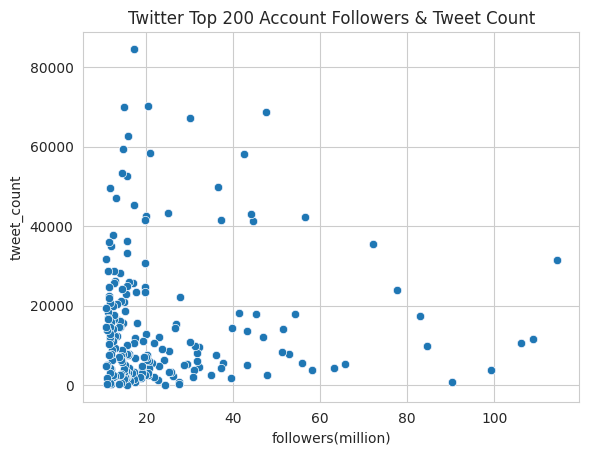

In [167]:
sns.scatterplot(data=twitter_top_200, x='followers(million)',y='tweet_count',c='b')
sns.scatterplot(data=twitter_top_200, x='followers(million)',y='tweet_count').set_title('Twitter Top 200 Account Followers & Tweet Count')
plt.show()

In [168]:
twitter_corr = twitter_top_200[['followers(million)','tweet_count']].corr()

<Axes: >

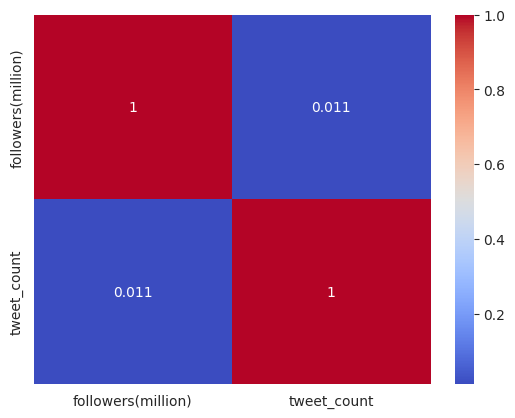

In [169]:
sns.heatmap(twitter_corr, annot=True, cmap='coolwarm')

In [170]:
tweet_count = twitter_top_200['tweet_count']
twitter_followers = twitter_top_200['followers(million)']

tweet_count = sm.add_constant(tweet_count)

model_twitter = sm.OLS(twitter_followers, tweet_count).fit()

results_twitter = model_twitter.summary()

print(results_twitter)

                            OLS Regression Results                            
Dep. Variable:     followers(million)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02238
Date:                Tue, 28 Nov 2023   Prob (F-statistic):              0.881
Time:                        19:59:59   Log-Likelihood:                -874.02
No. Observations:                 200   AIC:                             1752.
Df Residuals:                     198   BIC:                             1759.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.1842      1.871     12.927      

In [171]:
ins_top_1000 = pd.read_csv('instagram_global_top_1000.csv')

ins_top_1000

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803
...,...,...,...,...,...,...,...,...,...,...,...
995,All,996,senoritasaeva,Dina Saeva,https://www.instagram.com/senoritasaeva/,Lifestyle|Music|Modeling,7700000.0,Russia,246600.0,318200.0,2022-02-07 16:50:24.798803
996,All,997,manuelneuer,Manuel Neuer,https://www.instagram.com/manuelneuer/,Sports with a ball,11500000.0,Germany,146500.0,210200.0,2022-02-07 16:50:24.798803
997,All,998,sahilkhan,India’s Youth & Fitness IC⭕️N®,https://www.instagram.com/sahilkhan/,Fitness|Gym,10100000.0,India,176500.0,239800.0,2022-02-07 16:50:24.798803
998,All,999,mohanshakti,Shakti Mohan,https://www.instagram.com/mohanshakti/,Art|Artists|Cinema|Actors/actresses,13700000.0,India,146400.0,175500.0,2022-02-07 16:50:24.798803


In [172]:
ins_top_1000.dtypes

Country                  object
Rank                      int64
Account                  object
Title                    object
Link                     object
Category                 object
Followers               float64
Audience Country         object
Authentic engagement    float64
Engagement avg          float64
Scraped                  object
dtype: object

In [173]:
ins_top_1000 = ins_top_1000[['Rank','Account','Title','Category','Followers','Audience Country','Authentic engagement']]

ins_top_1000

,Rank,Account,Title,Category,Followers,Audience Country,Authentic engagement
0,1,cristiano,Cristiano Ronaldo,Sports with a ball,400100000.0,India,7800000.0
1,2,kyliejenner,Kylie 🤍,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0
2,3,leomessi,Leo Messi,Sports with a ball|Family,306300000.0,Argentina,4800000.0
3,4,kendalljenner,Kendall,Modeling|Fashion,217800000.0,United States,3400000.0
4,5,selenagomez,Selena Gomez,Music|Lifestyle,295800000.0,United States,2700000.0
...,...,...,...,...,...,...,...
995,996,senoritasaeva,Dina Saeva,Lifestyle|Music|Modeling,7700000.0,Russia,246600.0
996,997,manuelneuer,Manuel Neuer,Sports with a ball,11500000.0,Germany,146500.0
997,998,sahilkhan,India’s Youth & Fitness IC⭕️N®,Fitness|Gym,10100000.0,India,176500.0
998,999,mohanshakti,Shakti Mohan,Art|Artists|Cinema|Actors/actresses,13700000.0,India,146400.0


In [174]:
ins_top_1000 = ins_top_1000.set_index('Rank')

ins_top_1000

,Account,Title,Category,Followers,Audience Country,Authentic engagement
Rank,,,,,,
1,cristiano,Cristiano Ronaldo,Sports with a ball,400100000.0,India,7800000.0
2,kyliejenner,Kylie 🤍,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0
3,leomessi,Leo Messi,Sports with a ball|Family,306300000.0,Argentina,4800000.0
4,kendalljenner,Kendall,Modeling|Fashion,217800000.0,United States,3400000.0
5,selenagomez,Selena Gomez,Music|Lifestyle,295800000.0,United States,2700000.0
...,...,...,...,...,...,...
996,senoritasaeva,Dina Saeva,Lifestyle|Music|Modeling,7700000.0,Russia,246600.0
997,manuelneuer,Manuel Neuer,Sports with a ball,11500000.0,Germany,146500.0
998,sahilkhan,India’s Youth & Fitness IC⭕️N®,Fitness|Gym,10100000.0,India,176500.0


In [175]:
ins_top_1000['Category'].value_counts()

Music                                             170
Cinema|Actors/actresses                           165
Sports with a ball                                103
Lifestyle                                          58
Music|Cinema|Actors/actresses                      20
                                                 ... 
Modeling|Fashion|Lifestyle                          1
Fashion|Modeling|Beauty                             1
Cinema|Actors/actresses|Comics  sketches|Shows      1
Lifestyle|Cinema|Actors/actresses|Music             1
Lifestyle|Music|Modeling                            1
Name: Category, Length: 165, dtype: int64

In [176]:
ins_top_1000['Category'].unique()

array(['Sports with a ball', 'Fashion|Modeling|Beauty',
       'Sports with a ball|Family', 'Modeling|Fashion', 'Music|Lifestyle',
       'Cinema|Actors/actresses|Fashion', 'Fashion|Beauty',
       'Music|Fashion', 'Music', 'Cinema|Actors/actresses', nan,
       'Clothing|Outfits|Lifestyle', 'Music|Beauty',
       'Cinema|Actors/actresses|Fitness|Gym', 'Photography', 'Lifestyle',
       'Beauty', 'Music|Cinema|Actors/actresses', 'Modeling|Lifestyle',
       'Finance|Economics|Business|Careers', 'Lifestyle|Shows',
       'Lifestyle|Fashion|Clothing|Outfits', 'Art|Artists',
       'Beauty|Art|Artists|Cinema|Actors/actresses',
       'Cinema|Actors/actresses|Modeling', 'Humor|Fun|Happiness',
       'Lifestyle|Modeling', 'Cinema|Actors/actresses|Modeling|Lifestyle',
       'Family|Sports with a ball', 'Fitness|Gym|Lifestyle',
       'Science|Photography', 'Modeling',
       'Cinema|Actors/actresses|Art|Artists', 'Music|Modeling',
       'Literature|Journalism|Cinema|Actors/actresses|Fashio

In [177]:
ins_top_1000[ins_top_1000['Category'].isna()]

,Account,Title,Category,Followers,Audience Country,Authentic engagement
Rank,,,,,,
16,abcdefghi__lmnopqrstuvwxyz,Jungkook,NaN,32100000.0,United States,13400000.0
17,khaby00,Khaby Lame,NaN,69200000.0,Iran,4000000.0
21,thv,V,NaN,34100000.0,NaN,10400000.0
26,jin,Jin of BTS,NaN,28400000.0,United States,11100000.0
27,agustd,SUGA of BTS 민윤기,NaN,27900000.0,NaN,10600000.0
...,...,...,...,...,...,...
951,you_r_love,김유정🇰🇷,NaN,5300000.0,Indonesia,379900.0
965,chloebailey,Chlöe,NaN,4600000.0,United States,281900.0
969,caviarmagnat,by Tregubov,NaN,11900000.0,Russia,147400.0


In [178]:
ins_top_1000['Category'] = ins_top_1000['Category'].fillna('unknown')

In [179]:
ins_entertainment = ins_top_1000[ins_top_1000['Category'].str.contains('Music|Fashion|Modeling|Cinema|Actors|actresses|Shows')]['Authentic engagement']

ins_sports = ins_top_1000[ins_top_1000['Category'].str.contains('Sports|Fitness|Gym|Racing|Trainers|Coaches')]['Authentic engagement']

ins_life = ins_top_1000[ins_top_1000['Category'].str.contains('Lifestyle|Family|Outdoor activity|Clothing|Outfits|Beauty')]['Authentic engagement']

In [180]:
f_stat, p_value_anova = f_oneway(ins_entertainment, ins_sports, ins_life)
print(f"ANOVA: f_stat={f_stat:.2f}, p_value={p_value_anova:.4f}")

ANOVA: f_stat=2.47, p_value=0.0851


In [181]:
alpha = 0.10
# Prepare the data for Tukey's HSD test
df_concat = pd.concat([ins_entertainment, ins_sports, ins_life])
labels = ['ins_entertainment'] * len(ins_entertainment) + ['ins_sports'] * len(ins_sports) + ['ins_life'] * len(ins_life)

# Perform Tukey's HSD Test
print("\nTukey's HSD Test:")
tukey = pairwise_tukeyhsd(endog=df_concat, groups=labels, alpha=alpha)
print(tukey)


Tukey's HSD Test:
              Multiple Comparison of Means - Tukey HSD, FWER=0.10               
      group1        group2     meandiff   p-adj     lower        upper    reject
--------------------------------------------------------------------------------
ins_entertainment   ins_life  -10850.4035 0.9856 -148197.7685 126496.9614  False
ins_entertainment ins_sports -172941.4141 0.0723   -334738.26 -11144.5682   True
         ins_life ins_sports -162091.0106 0.1768 -349198.7345  25016.7133  False
--------------------------------------------------------------------------------


In [182]:
tiktok_category = pd.read_excel('TikTok Category.xlsx')

tiktok_category

,Category,Popularity by Hashtag Search
0,Entertainment,535 Billion
1,Dance,181 Billion
2,Prank,79 Billion
3,Fitness/sports,57 Billion
4,Home reno/D.I.Y.,39 Billion
5,Beauty/skincare,33 Billion
6,Fashion,27 Billion
7,Recipes/cooking,18 Billion
8,Life hacks/advice,13 Billion
9,Pets,10 Billion


In [183]:
tiktok_category['Popularity by Hashtag Search'] = tiktok_category['Popularity by Hashtag Search'].str.replace('Billion','').astype(float)

In [184]:
tiktok_category = tiktok_category.rename(columns={'Popularity by Hashtag Search':'Hashtag Popularity(billion)'})

In [185]:
tiktok_category.dtypes

Category                        object
Hashtag Popularity(billion)    float64
dtype: object

In [186]:
tiktok_category

,Category,Hashtag Popularity(billion)
0,Entertainment,535.0
1,Dance,181.0
2,Prank,79.0
3,Fitness/sports,57.0
4,Home reno/D.I.Y.,39.0
5,Beauty/skincare,33.0
6,Fashion,27.0
7,Recipes/cooking,18.0
8,Life hacks/advice,13.0
9,Pets,10.0


In [187]:
tiktok_category.columns = tiktok_category.columns.str.strip()

(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

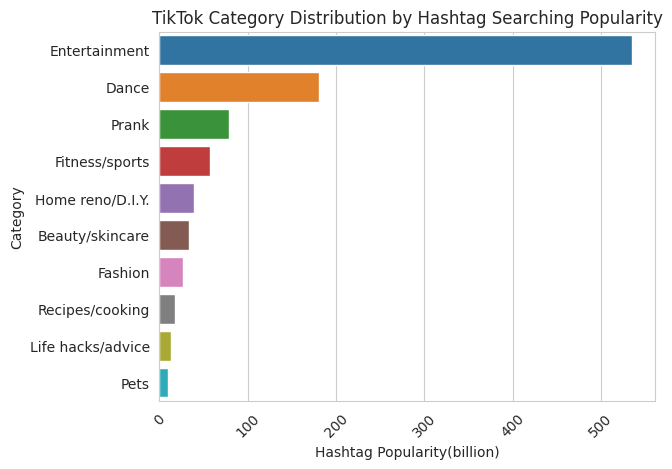

In [188]:
sns.barplot(y='Category', x='Hashtag Popularity(billion)', data=tiktok_category)
plt.title('TikTok Category Distribution by Hashtag Searching Popularity')
plt.xticks(rotation=45)